In [6]:
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import itertools

DATA_PATH = 'transcriptomic_preproc'
RANDOM_STATE = 42

In [7]:
adata = sc.read(DATA_PATH) # data already preprocess
adata

AnnData object with n_obs × n_vars = 247976 × 2789
    obs: 'dataset', 'disease', 'cell_type', 'sample', 'patient_id', 'time', 'cell_types_labels', 'patient', 'MS/HC', 'n_genes', 'percent_mito', 'n_counts'
    var: 'gene_ids', 'feature_types', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'hvg', 'log1p', 'pca'
    obsm: 'X_pca'
    varm: 'PCs'

In [8]:
adata = adata[adata.obs['cell_type'] == 'PBMC']
adata = adata[adata.obs['MS/HC'] == 'HC']

In [9]:
adata.obs['cell_types_labels'].value_counts()

cell_types_labels
T cells                    46546
B cells                     7017
ILC                         3104
Monocytes                   2710
Plasma cells                 570
DC                            38
HSC/MPP                       14
Megakaryocyte precursor        2
pDC                            1
Name: count, dtype: int64

In [10]:
# drop cells 'Double-negative thymocytes', 'Epithelial cells', 'B-cell lineage', 'MNP'
adata = adata[~adata.obs['cell_types_labels'].isin(['pDC'])]

### Finding markers gene

In [11]:
sc.tl.rank_genes_groups(adata, 'cell_types_labels', method='t-test', random_state=RANDOM_STATE)

c:\Users\giuli\anaconda3\lib\site-packages\scanpy\tools\_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}
c:\Users\giuli\anaconda3\lib\site-packages\scanpy\tools\_rank_genes_groups.py:455: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
c:\Users\giuli\anaconda3\lib\site-packages\scanpy\tools\_rank_genes_groups.py:455: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
c:\Users\giuli\anaconda3\lib\site-packages\scanpy\tools\_rank_genes_groups.py:455: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
c:\Users\giuli\anaconda3\lib\site-packages\scanpy\tools\_rank_genes_groups.py:455: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
c:\Users\giuli\anaconda3\lib\site-packa

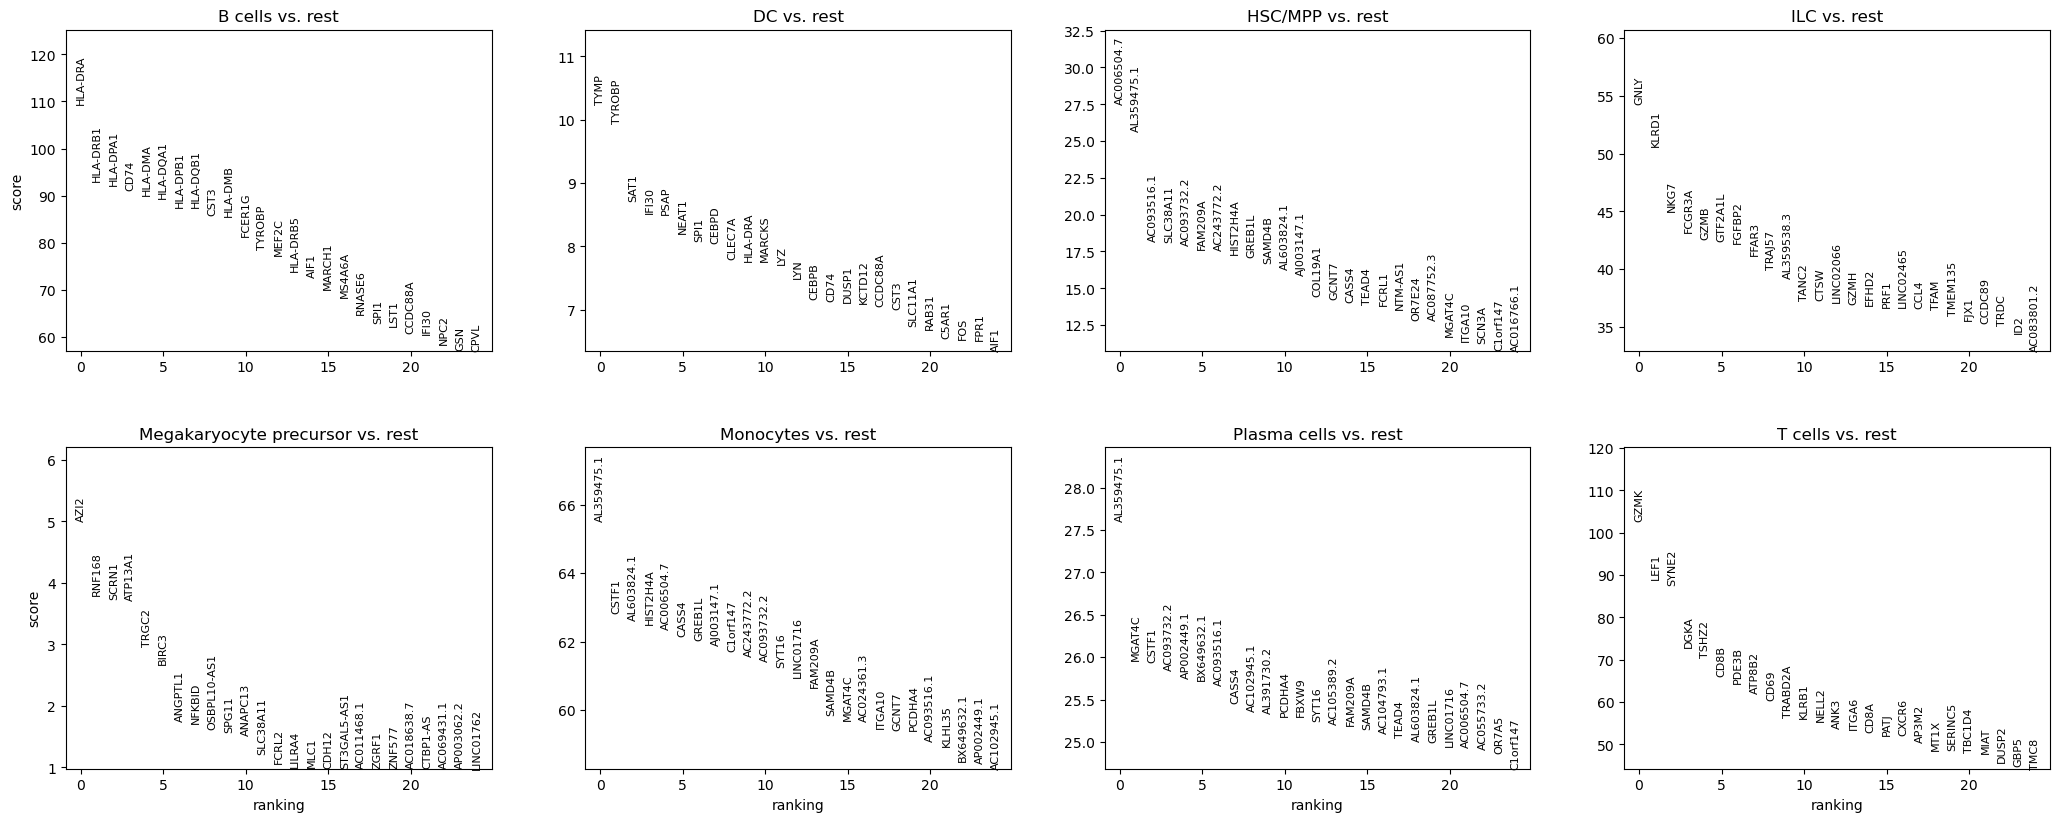

In [12]:
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)

In [13]:
pd.DataFrame(adata.uns['rank_genes_groups']['names'])[:10]

B cells       DC     HSC/MPP         ILC Megakaryocyte precursor  \
0   HLA-DRA     TYMP  AC006504.7        GNLY                    AZI2   
1  HLA-DRB1   TYROBP  AL359475.1       KLRD1                  RNF168   
2  HLA-DPA1     SAT1  AC093516.1        NKG7                   SCRN1   
3      CD74    IFI30    SLC38A11      FCGR3A                 ATP13A1   
4   HLA-DMA     PSAP  AC093732.2        GZMB                   TRGC2   
5  HLA-DQA1    NEAT1     FAM209A     GTF2A1L                   BIRC3   
6  HLA-DPB1     SPI1  AC243772.2      FGFBP2                 ANGPTL1   
7  HLA-DQB1    CEBPD    HIST2H4A       FFAR3                  NFKBID   
8      CST3   CLEC7A      GREB1L      TRAJ57             OSBPL10-AS1   
9   HLA-DMB  HLA-DRA      SAMD4B  AL359538.3                   SPG11   

    Monocytes Plasma cells  T cells  
0  AL359475.1   AL359475.1     GZMK  
1       CSTF1       MGAT4C     LEF1  
2  AL603824.1        CSTF1    SYNE2  
3    HIST2H4A   AC093732.2     DGKA  
4  AC006504.7   AP002449.1    TSHZ2  
5       CASS4   BX649632.1     CD8B  
6      GREB1L   AC093516.1    PDE3B  
7  AJ003147.1        CASS4   ATP8B2  
8    C1orf147   AC102945.1     CD69  
9  AC243772.2   AL391730.2  TRABD2A

In [14]:
# dict with cluster number as key and the genes as values
cluster_genes = {}
for cluster in pd.DataFrame(adata.uns['rank_genes_groups']['names']).columns:
    cluster_genes[cluster] = pd.DataFrame(adata.uns['rank_genes_groups']['names'])[cluster].tolist()[:20]

In [15]:
with open('results/markers_PBMC_HC.json', 'w') as f:
    json.dump(cluster_genes, f)

### Plots

c:\Users\giuli\anaconda3\lib\site-packages\scanpy\plotting\_tools\__init__.py:1303: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ax.set_xticklabels(new_gene_names, rotation="vertical")


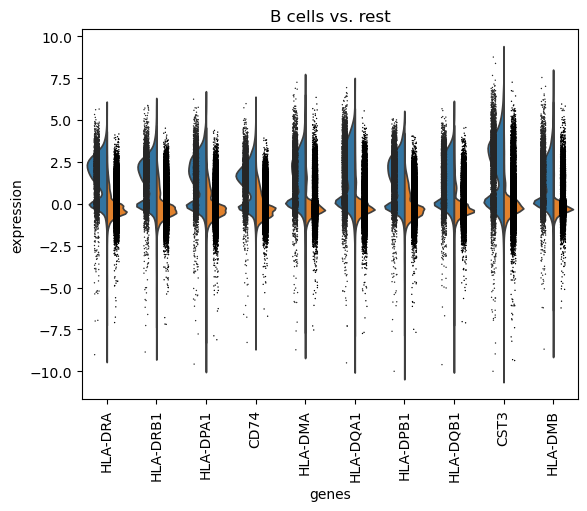

c:\Users\giuli\anaconda3\lib\site-packages\scanpy\plotting\_tools\__init__.py:1303: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ax.set_xticklabels(new_gene_names, rotation="vertical")


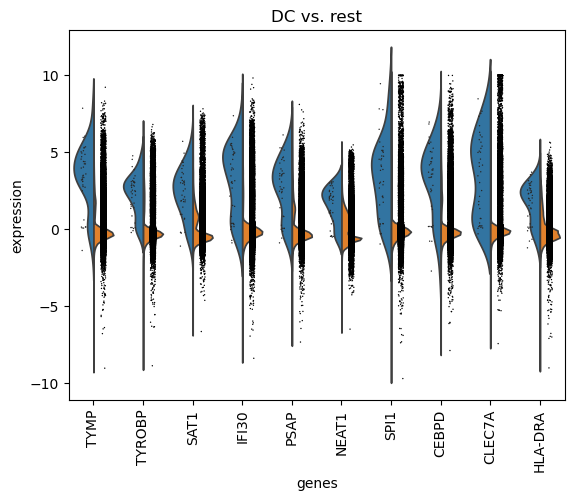

c:\Users\giuli\anaconda3\lib\site-packages\scanpy\plotting\_tools\__init__.py:1303: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ax.set_xticklabels(new_gene_names, rotation="vertical")


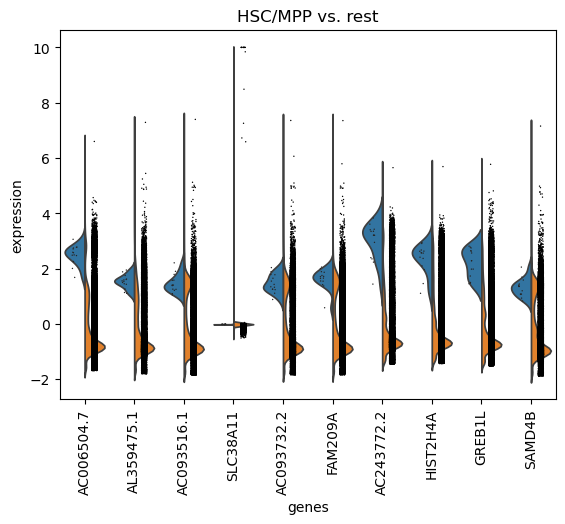

c:\Users\giuli\anaconda3\lib\site-packages\scanpy\plotting\_tools\__init__.py:1303: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ax.set_xticklabels(new_gene_names, rotation="vertical")


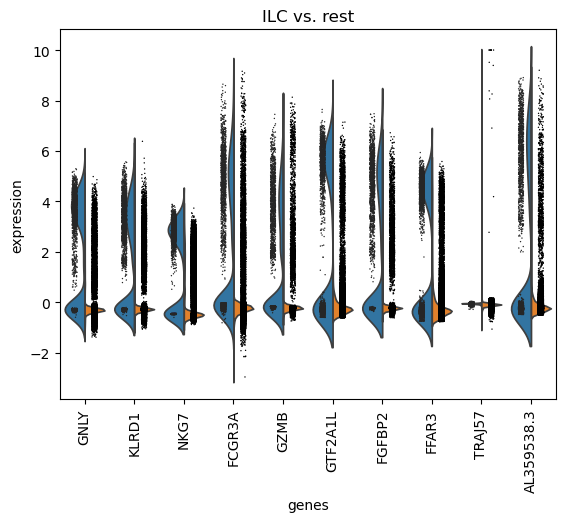

c:\Users\giuli\anaconda3\lib\site-packages\scanpy\plotting\_tools\__init__.py:1303: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ax.set_xticklabels(new_gene_names, rotation="vertical")


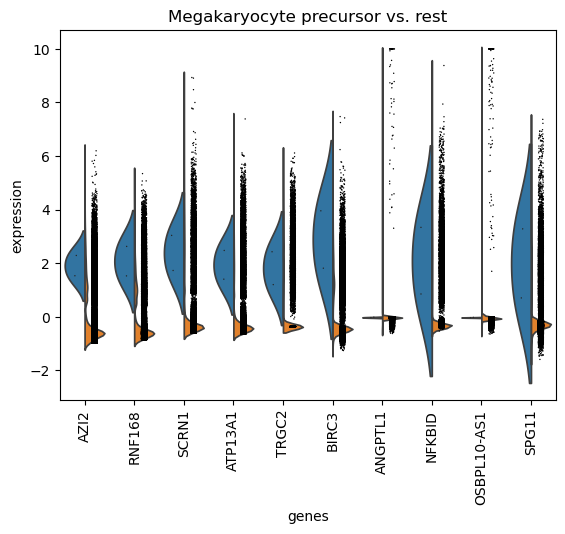

c:\Users\giuli\anaconda3\lib\site-packages\scanpy\plotting\_tools\__init__.py:1303: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ax.set_xticklabels(new_gene_names, rotation="vertical")


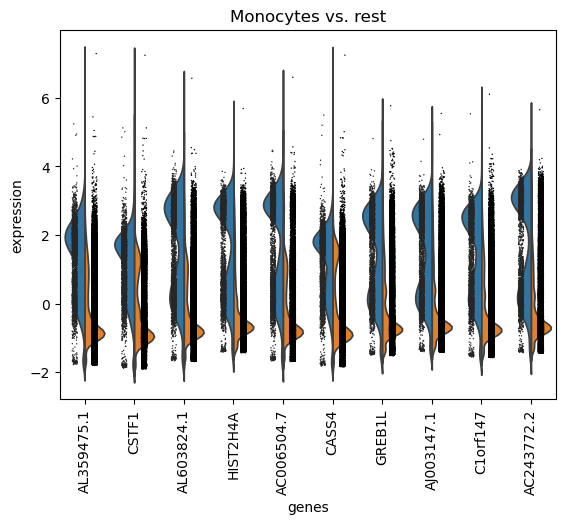

c:\Users\giuli\anaconda3\lib\site-packages\scanpy\plotting\_tools\__init__.py:1303: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ax.set_xticklabels(new_gene_names, rotation="vertical")


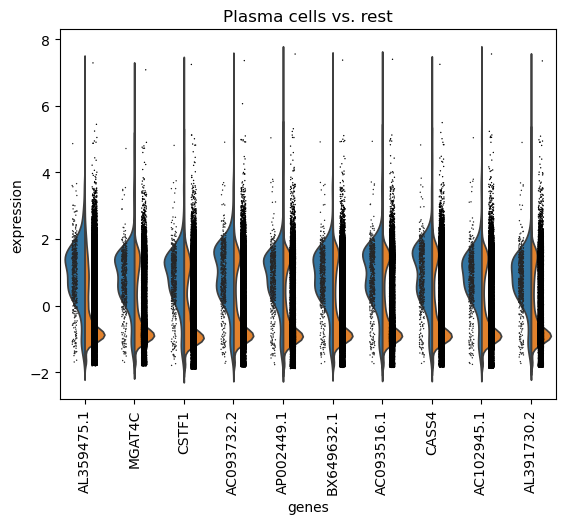

c:\Users\giuli\anaconda3\lib\site-packages\scanpy\plotting\_tools\__init__.py:1303: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ax.set_xticklabels(new_gene_names, rotation="vertical")


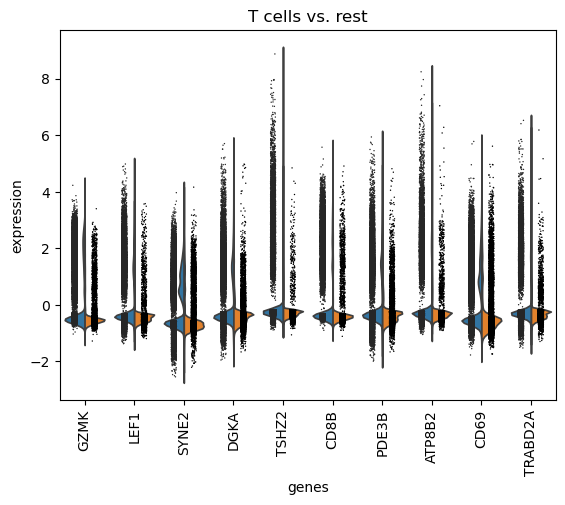

In [16]:
# visualize the clusters genes
sc.pl.rank_genes_groups_violin(adata, n_genes=10)

In [17]:
most_freq_cell_types = ['T cells', 'B cells', 'ILC', 'Monocytes', 'Plasma cells']

In [18]:
marker_genes = list(itertools.chain.from_iterable([cluster_genes[cell] for cell in most_freq_cell_types]))

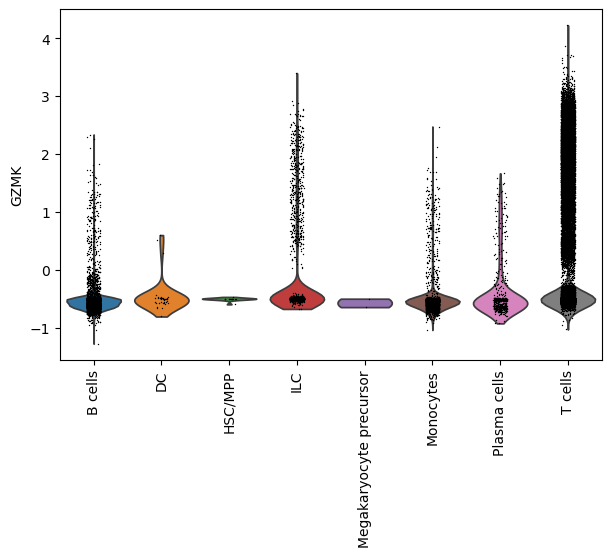

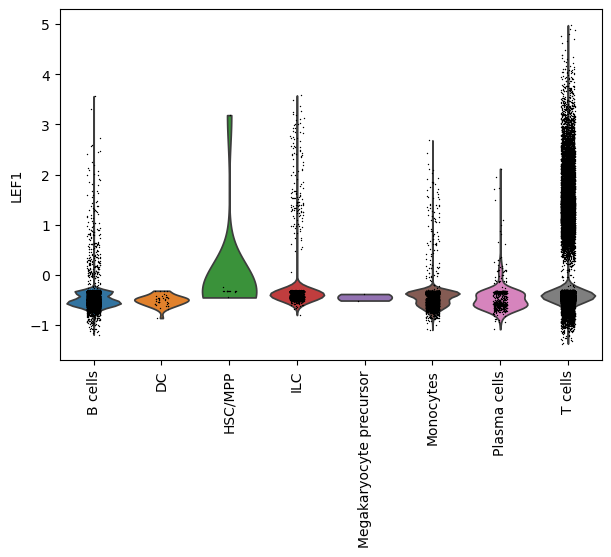

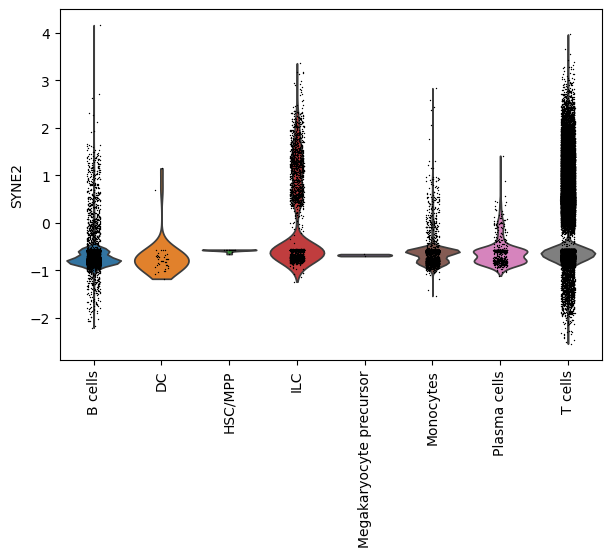

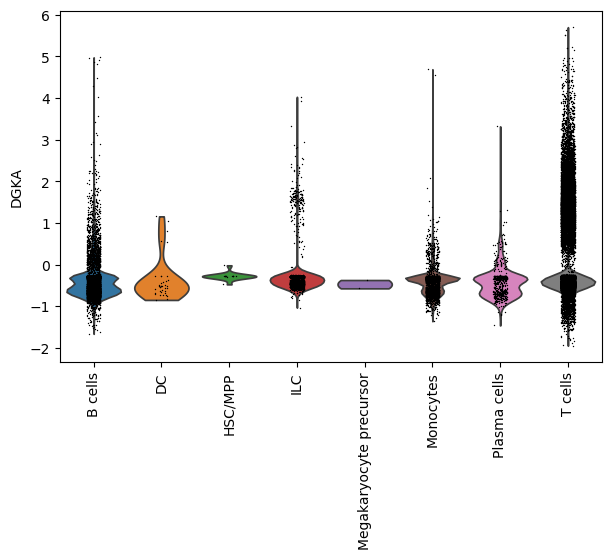

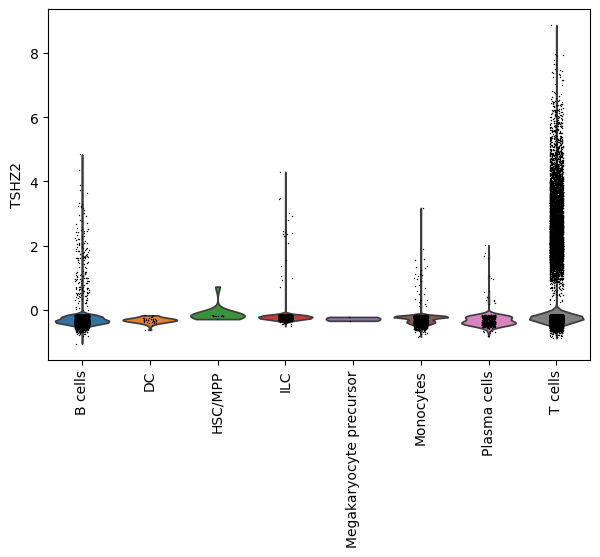

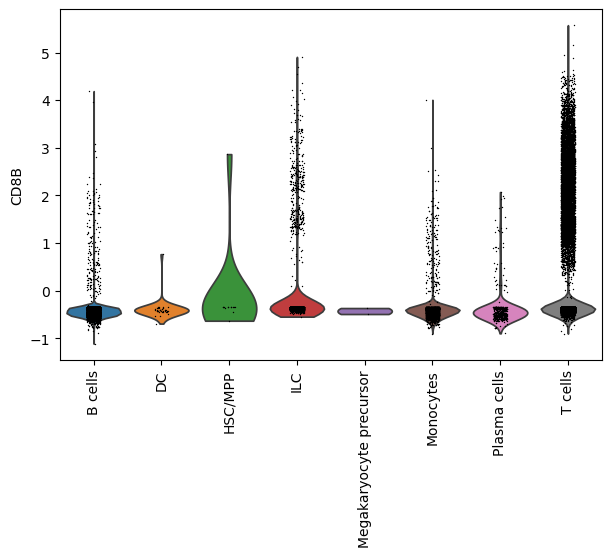

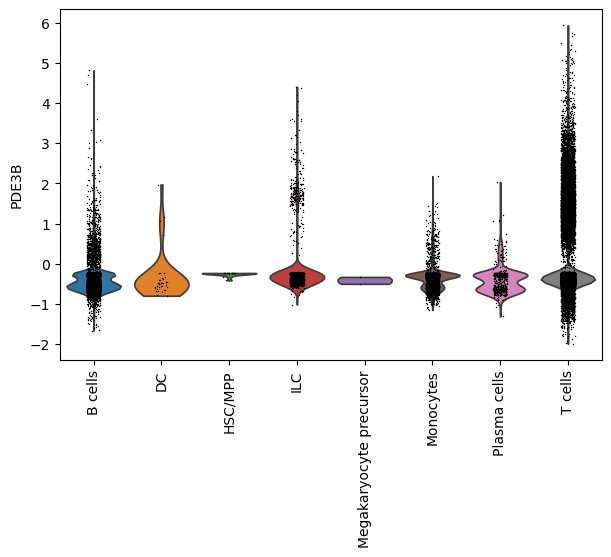

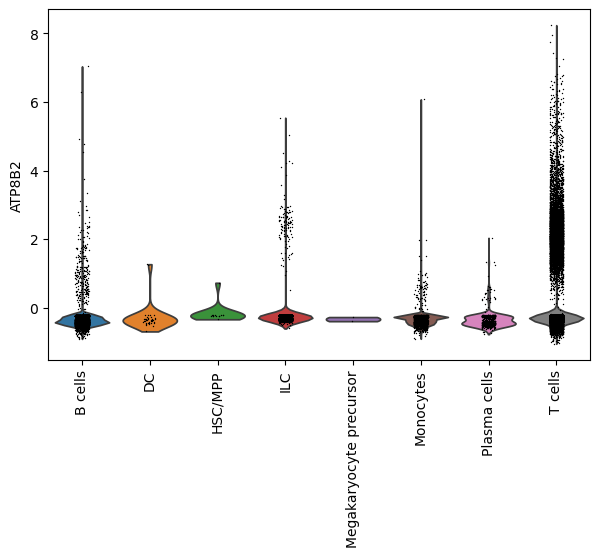

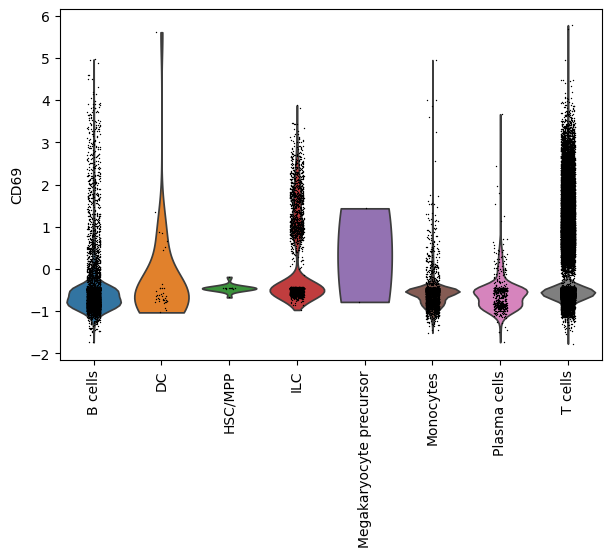

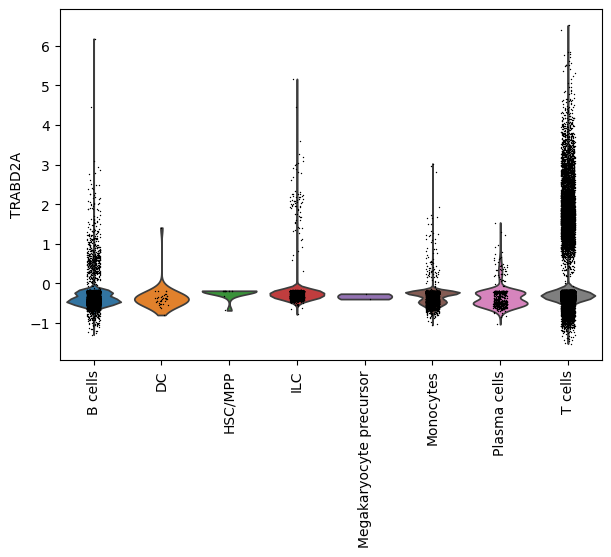

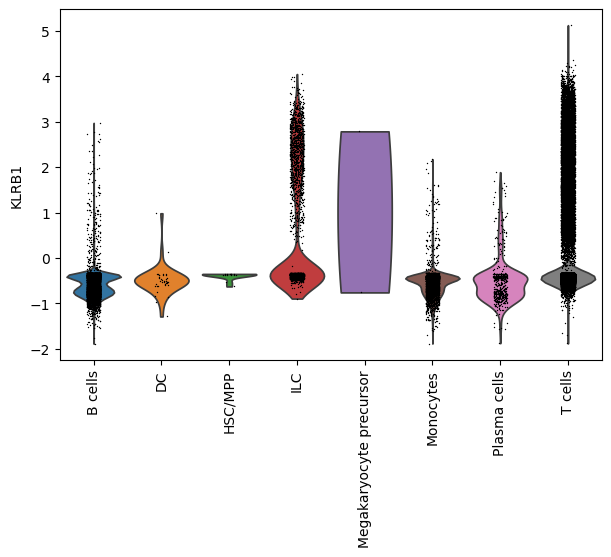

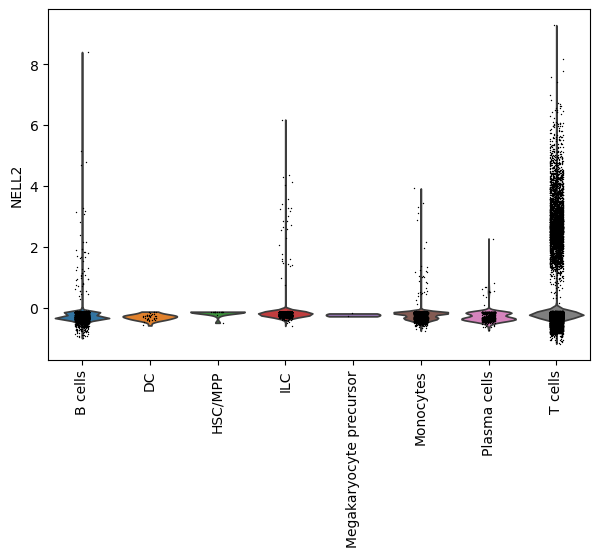

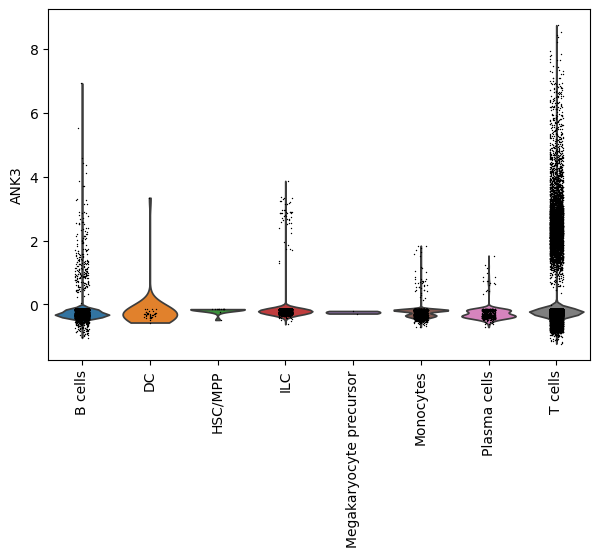

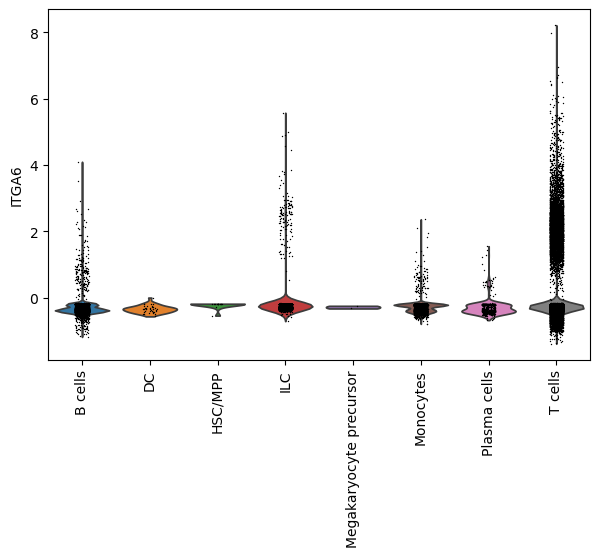

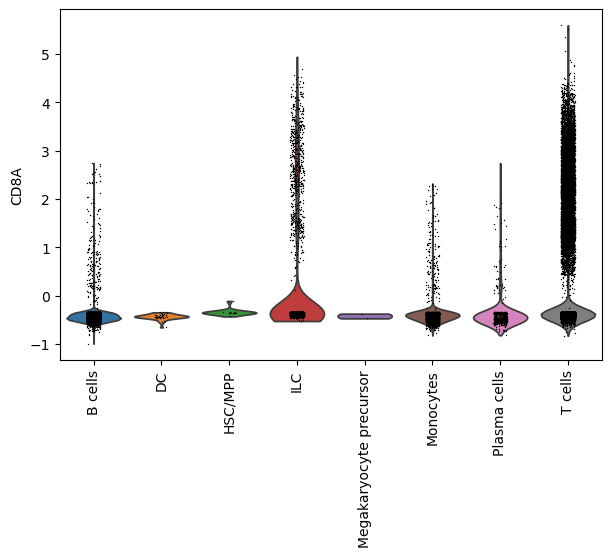

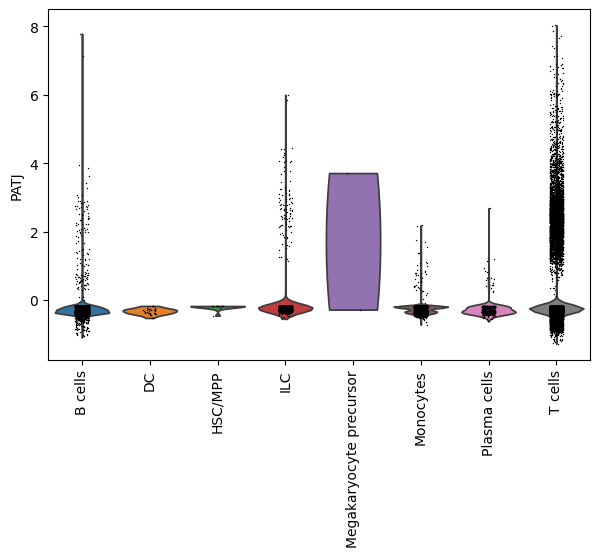

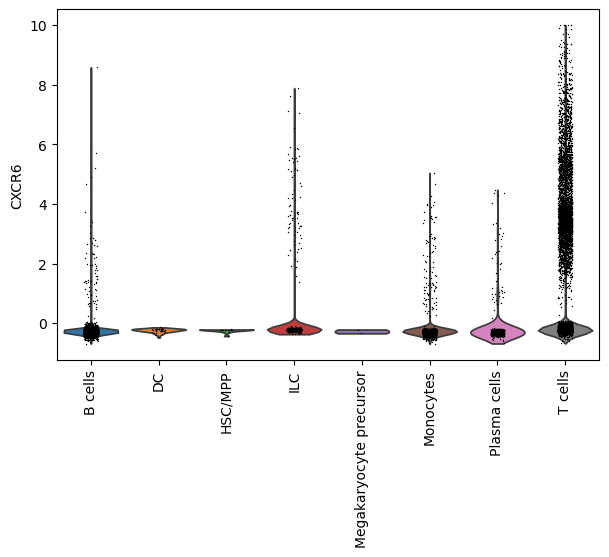

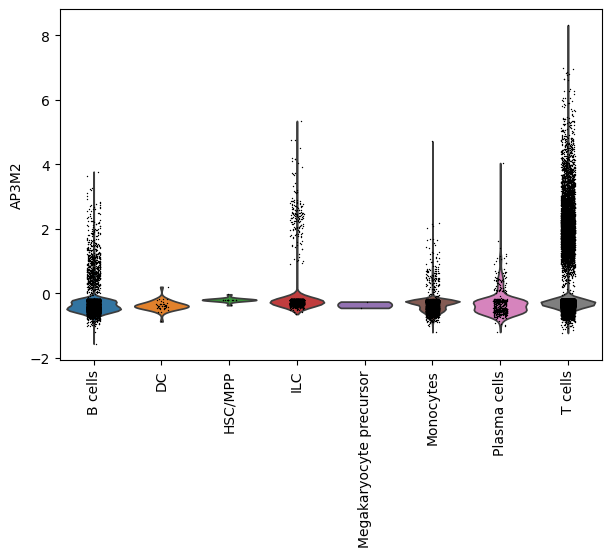

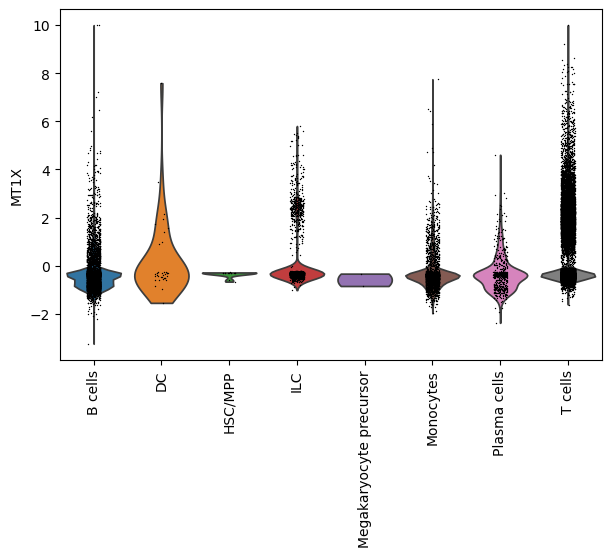

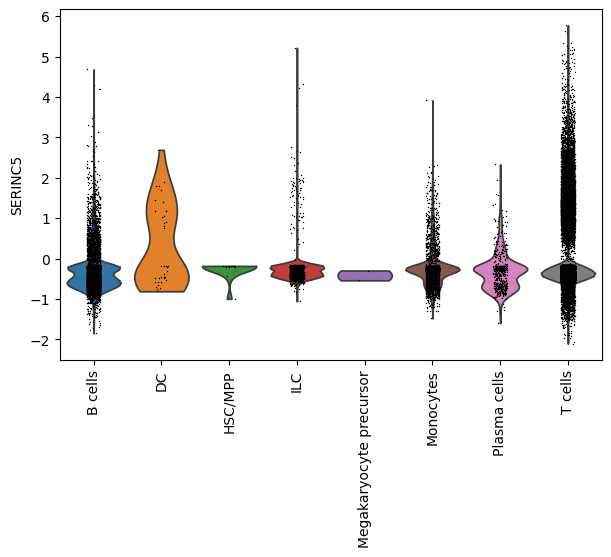

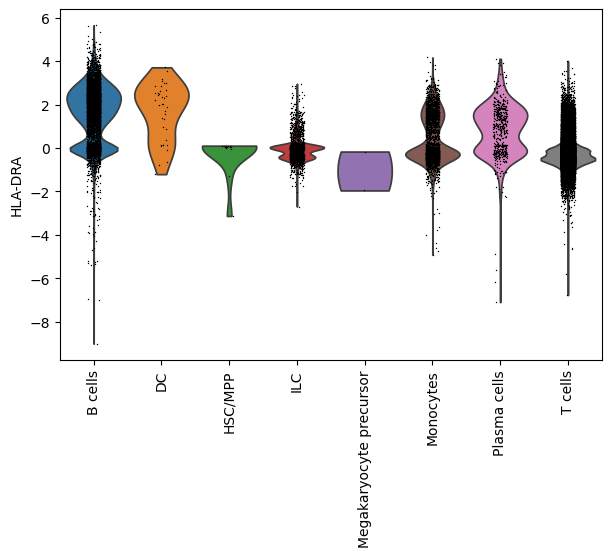

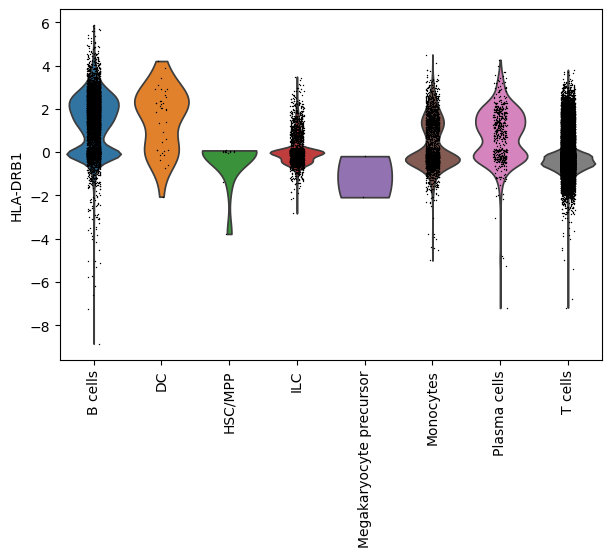

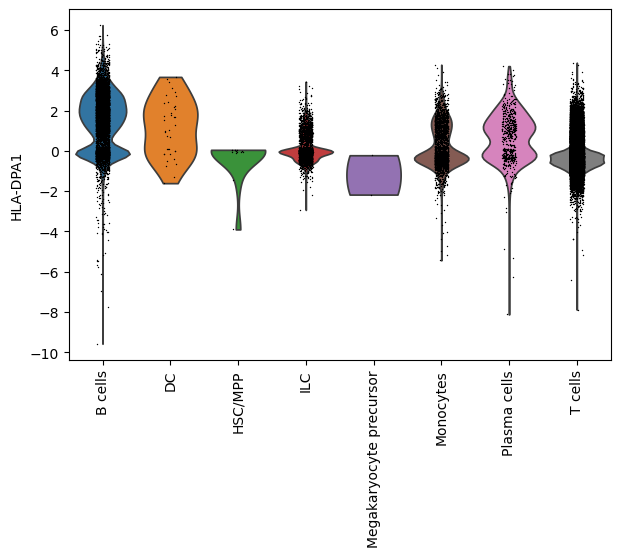

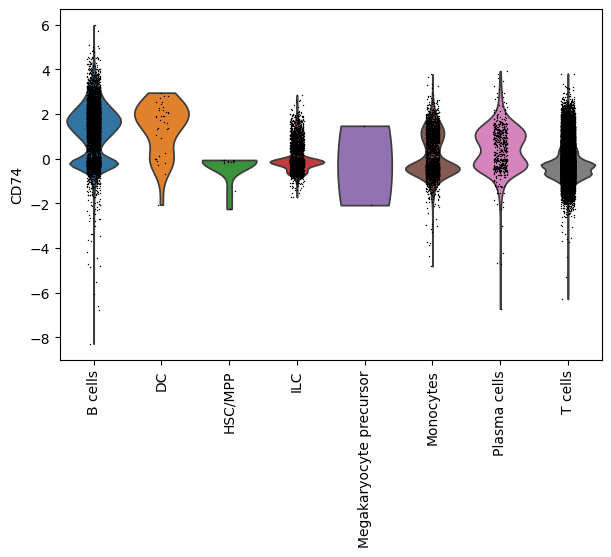

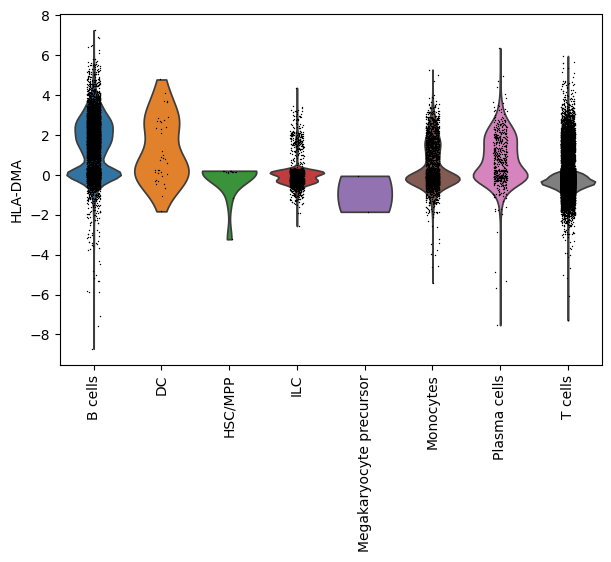

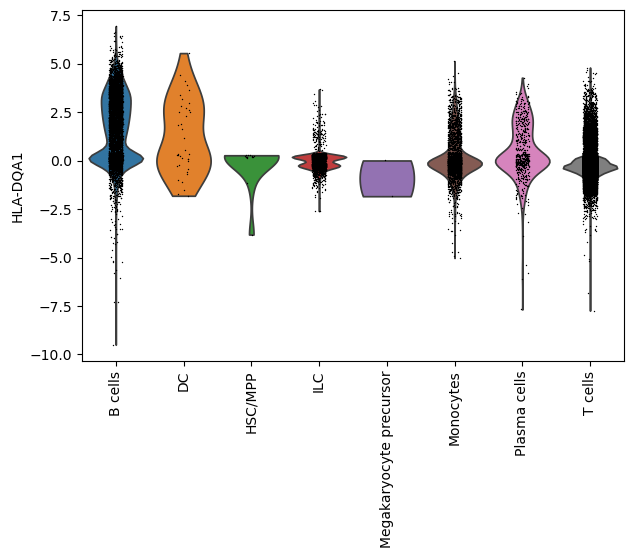

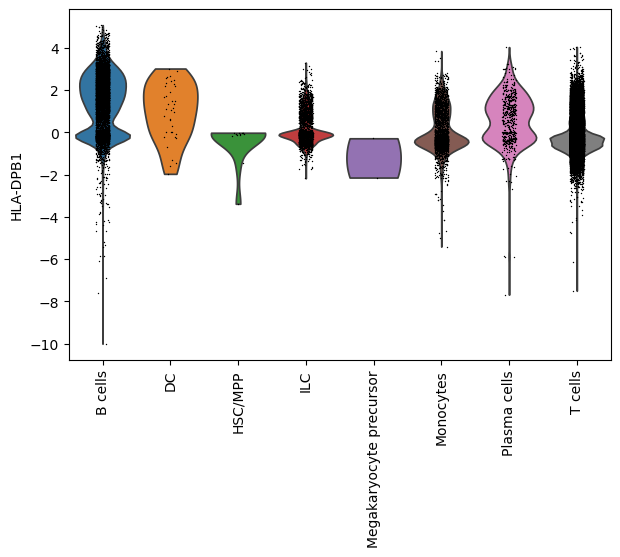

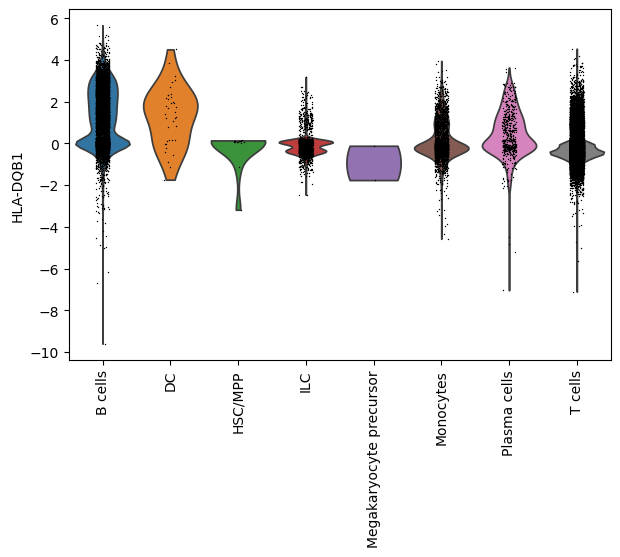

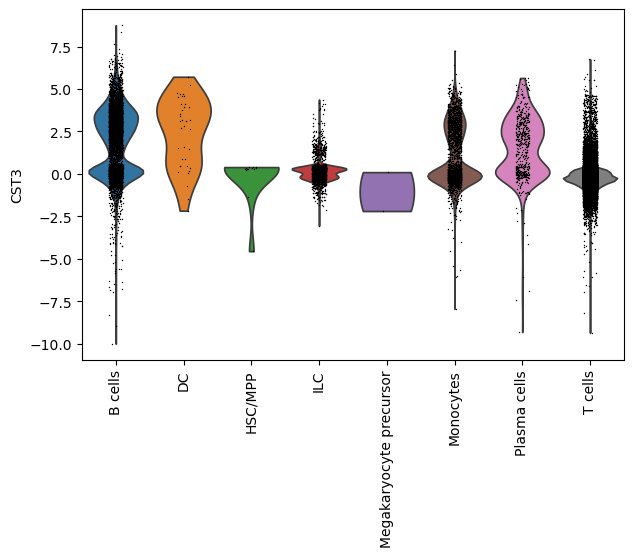

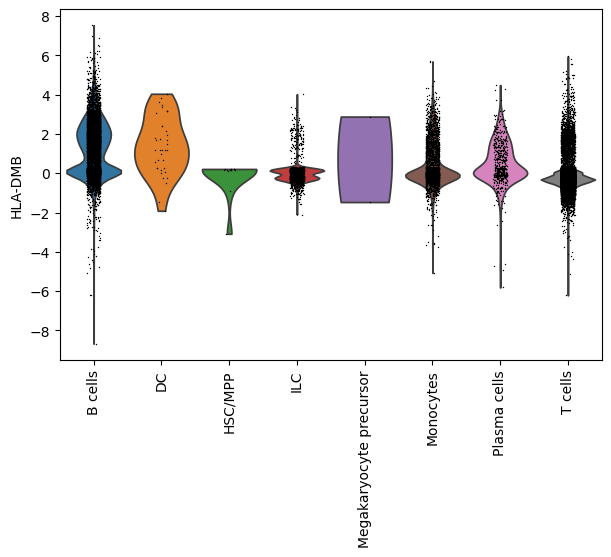

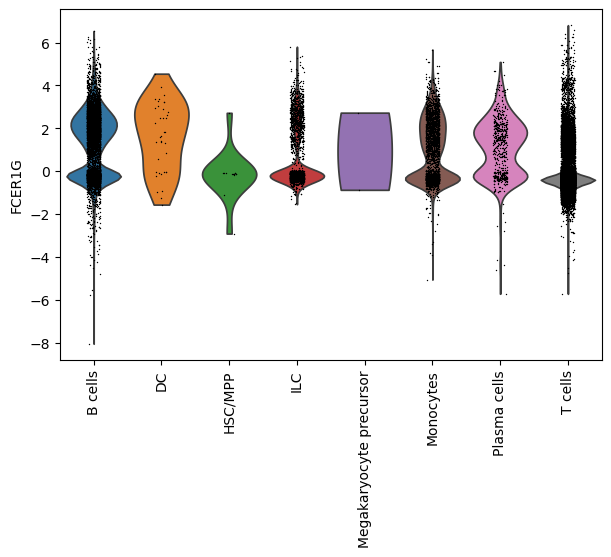

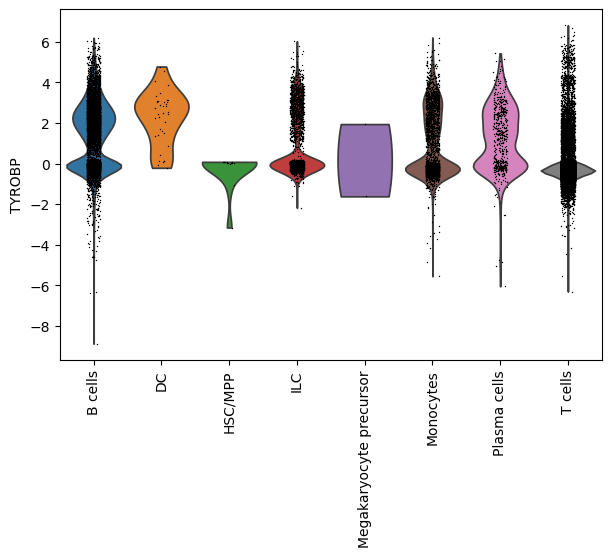

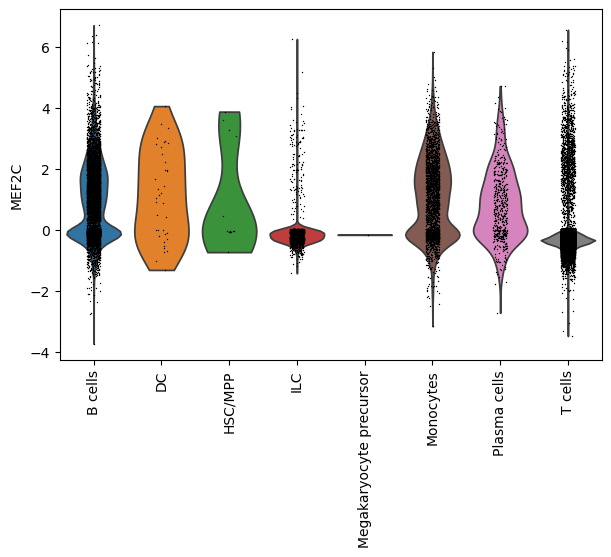

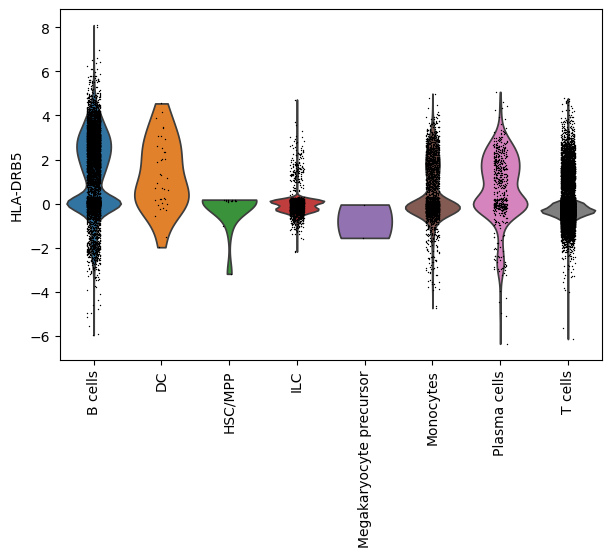

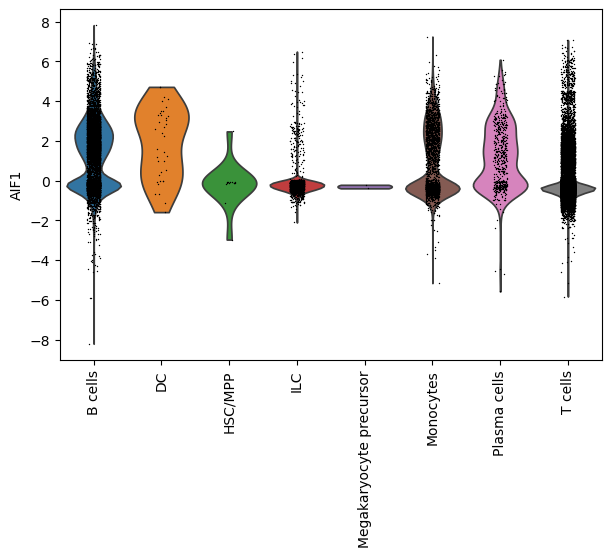

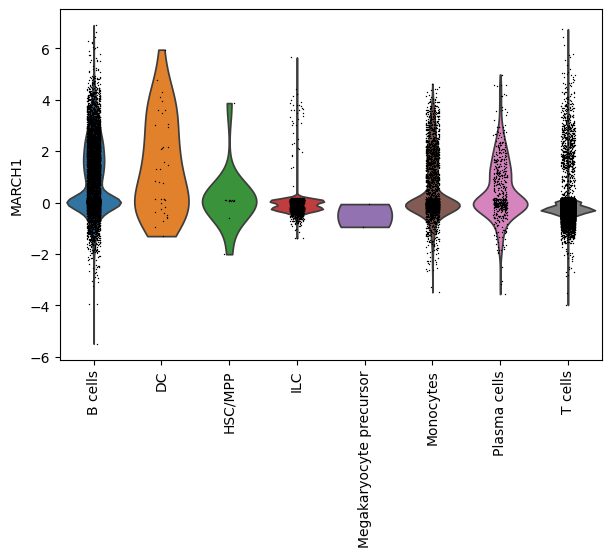

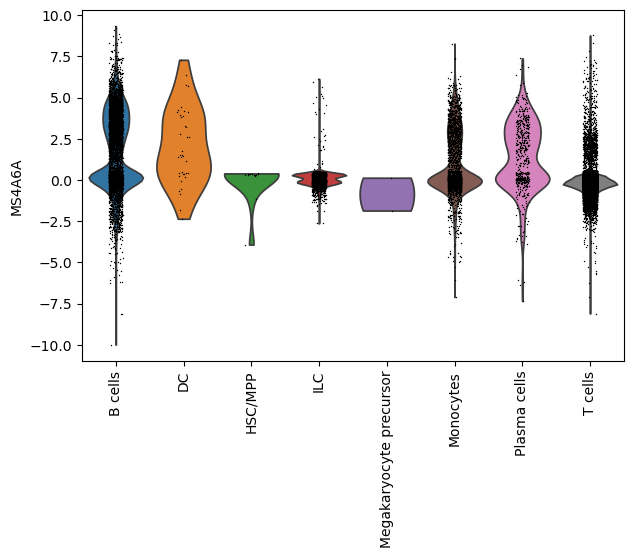

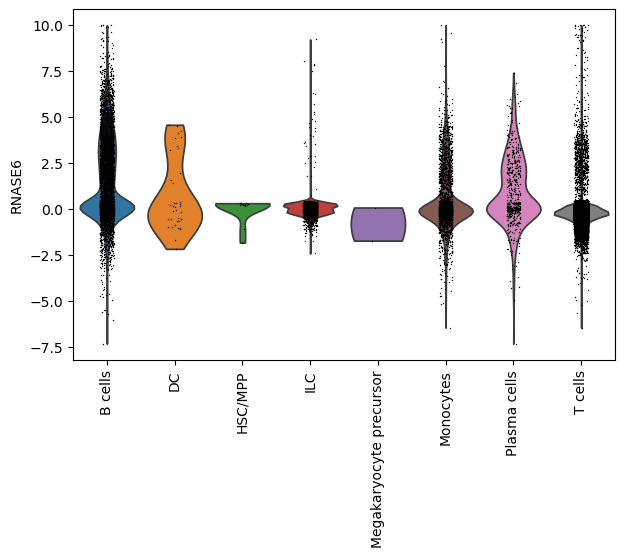

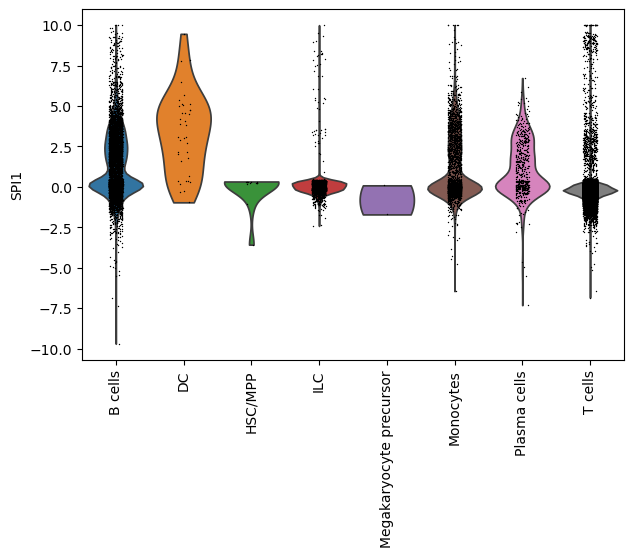

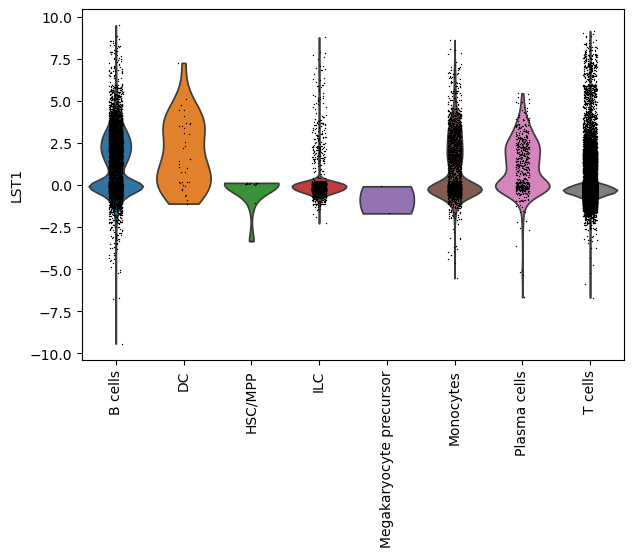

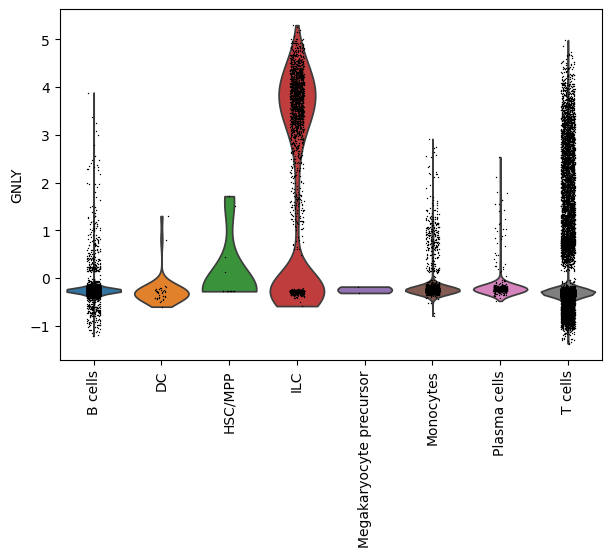

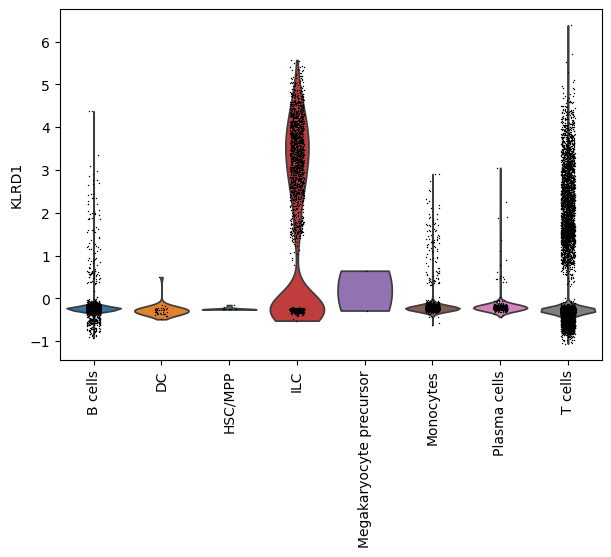

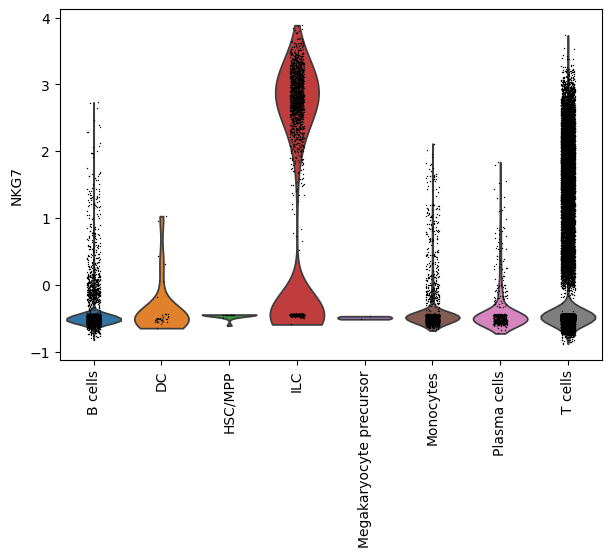

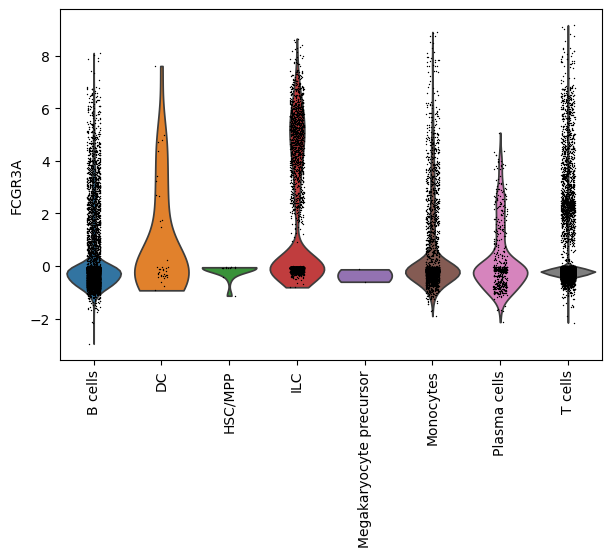

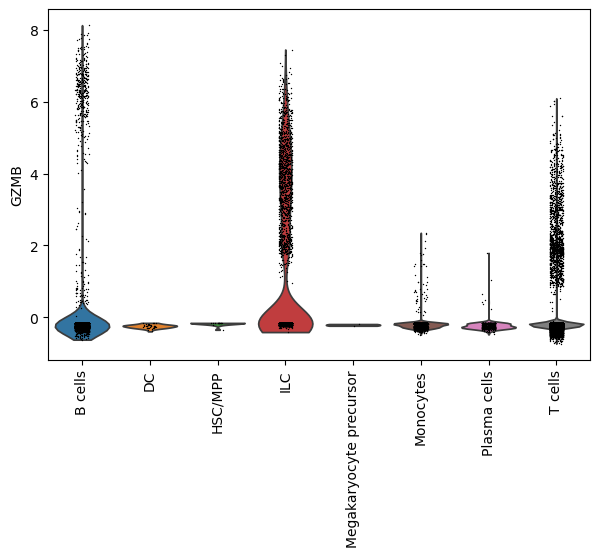

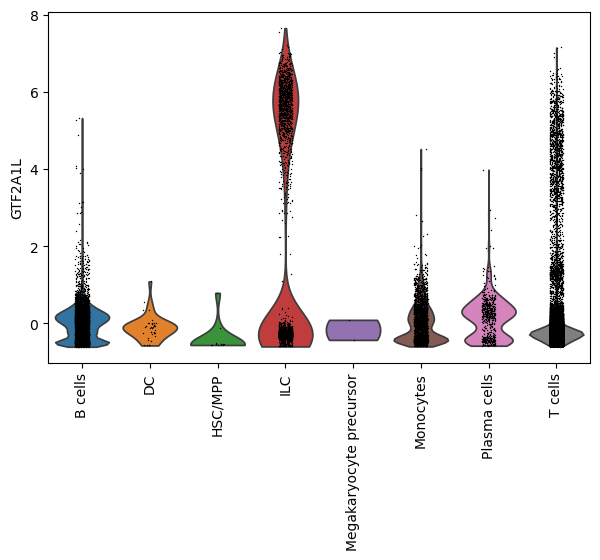

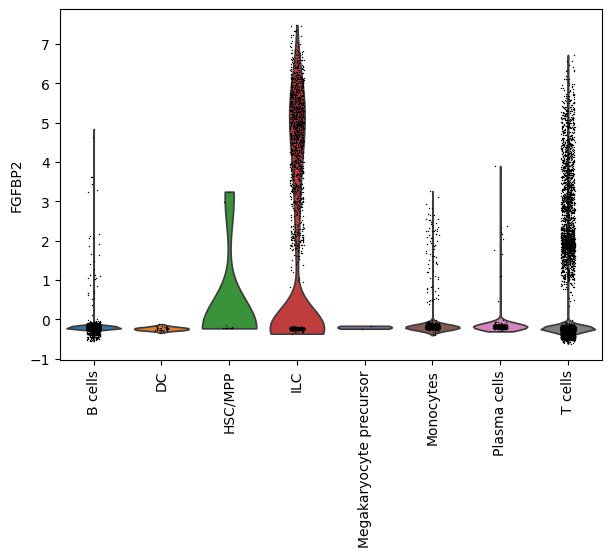

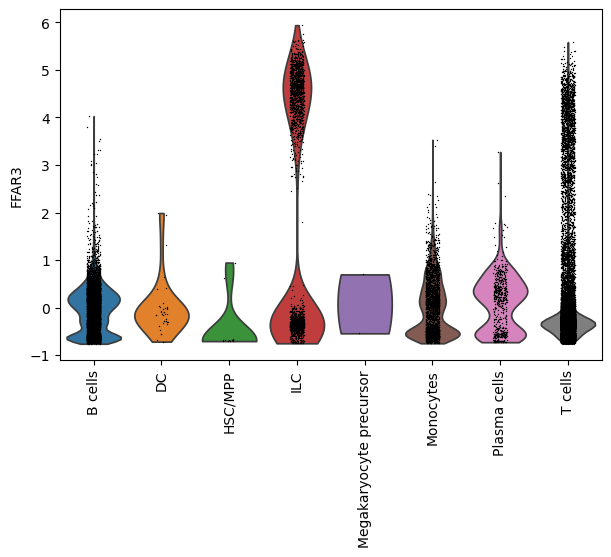

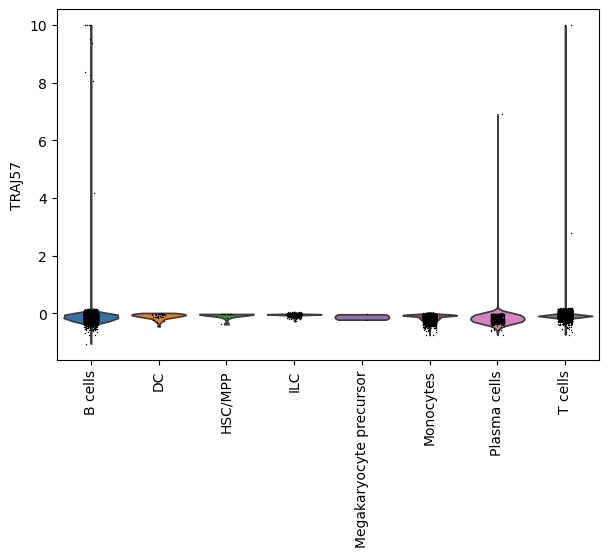

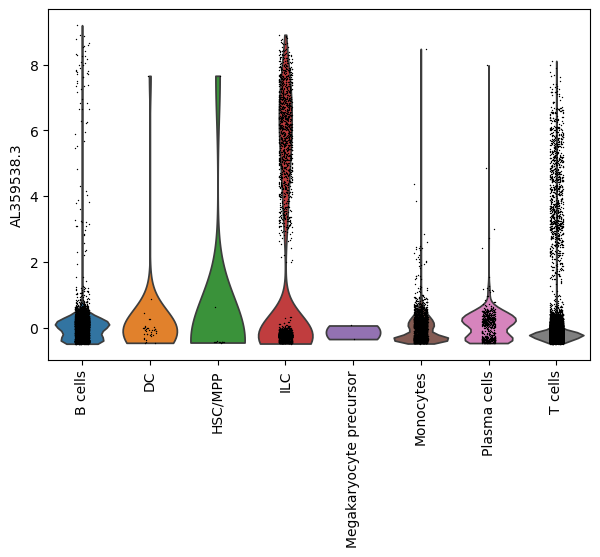

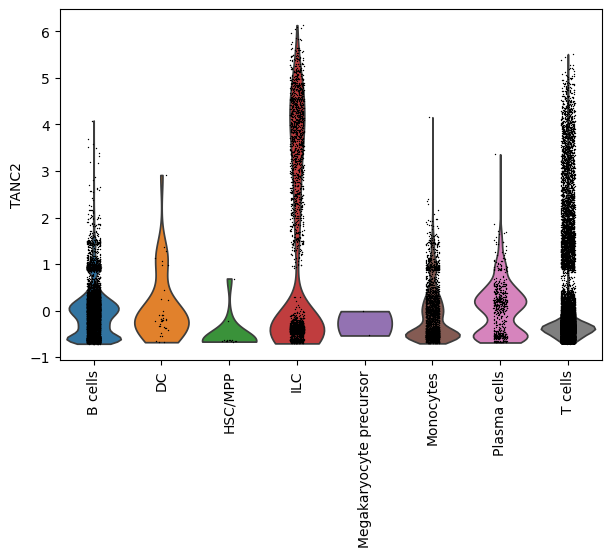

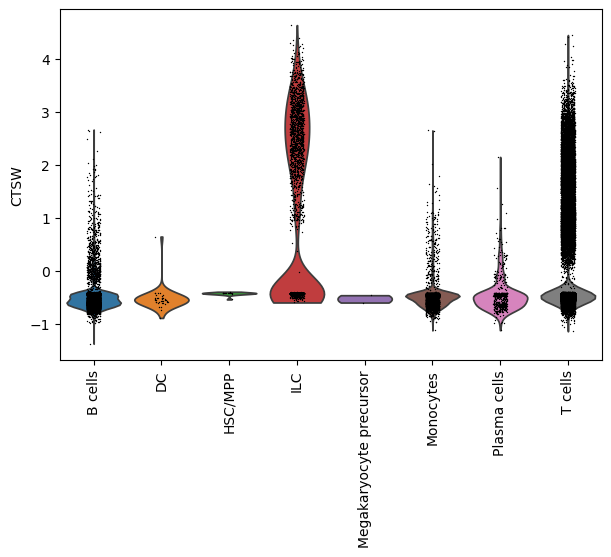

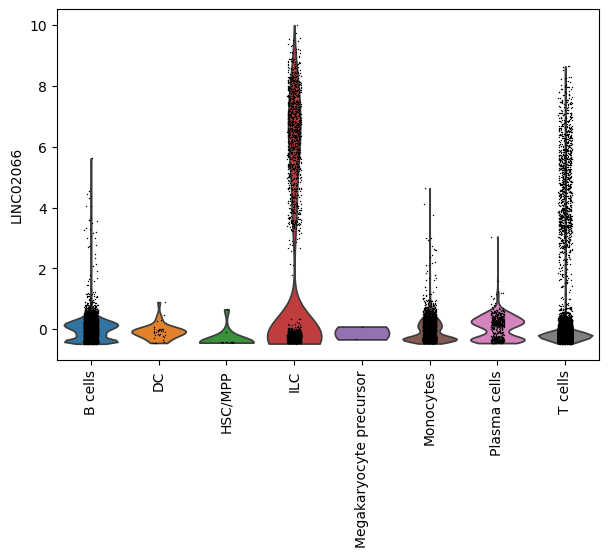

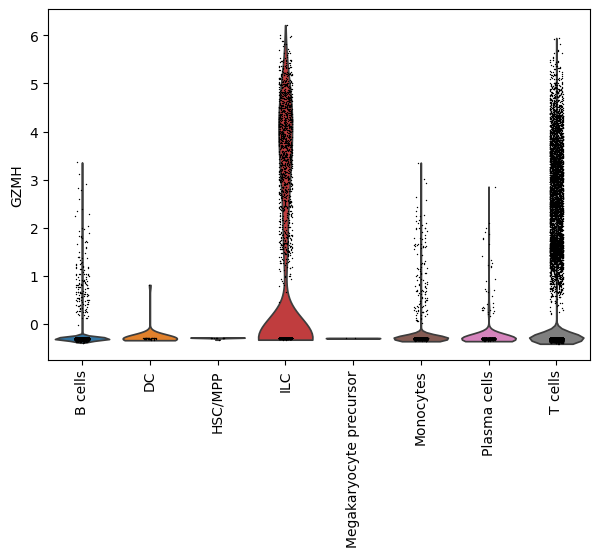

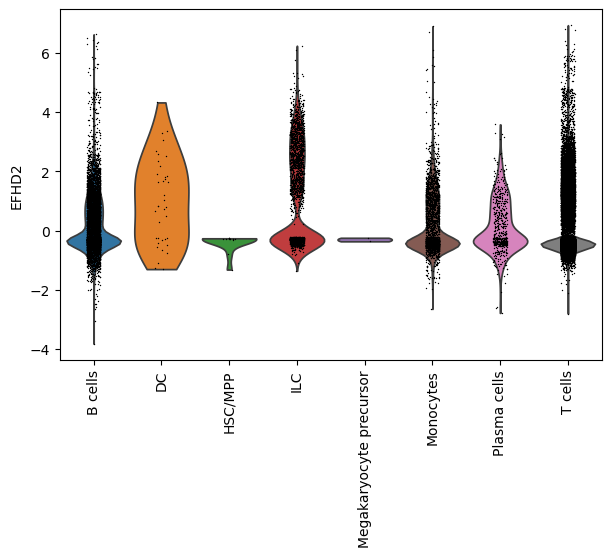

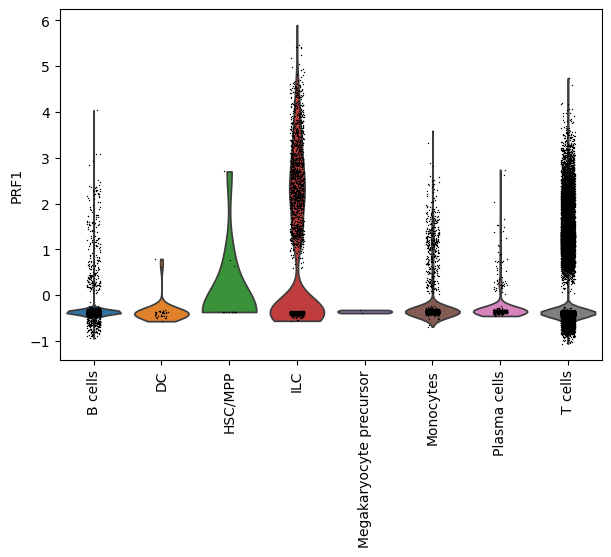

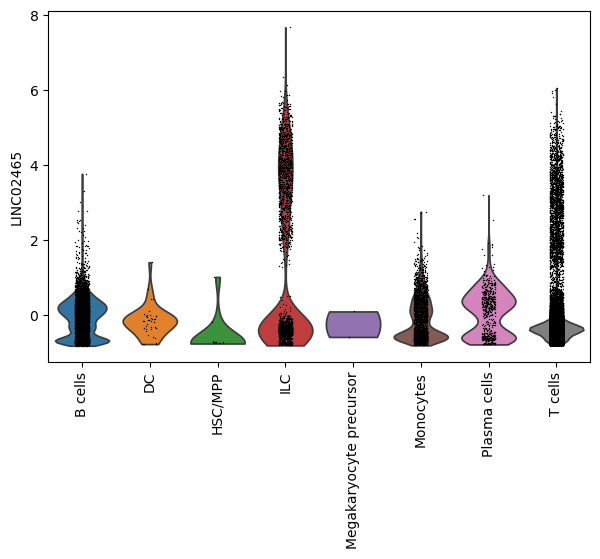

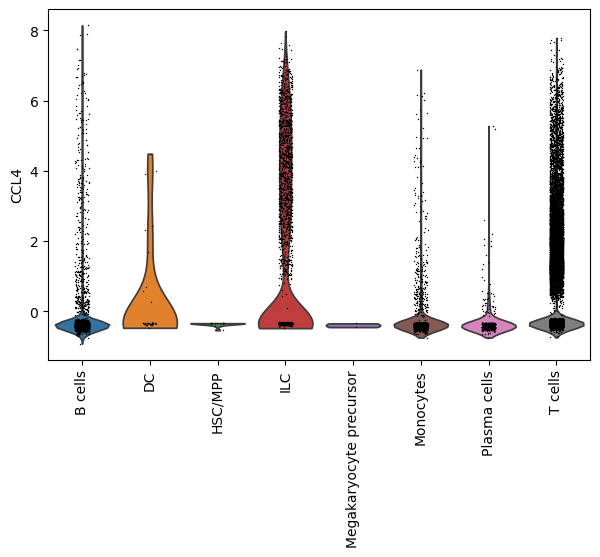

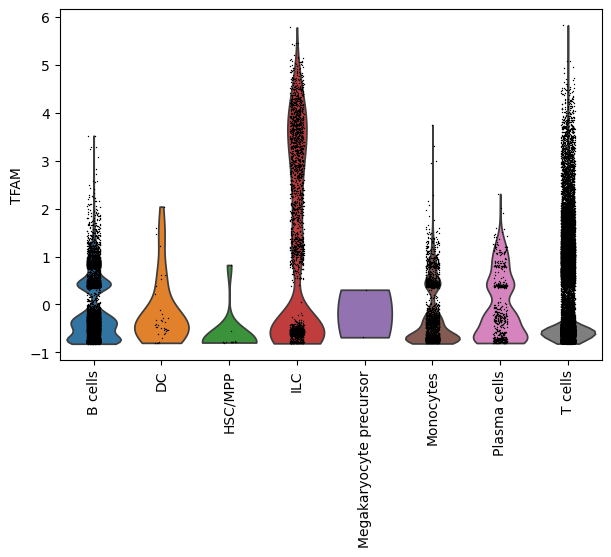

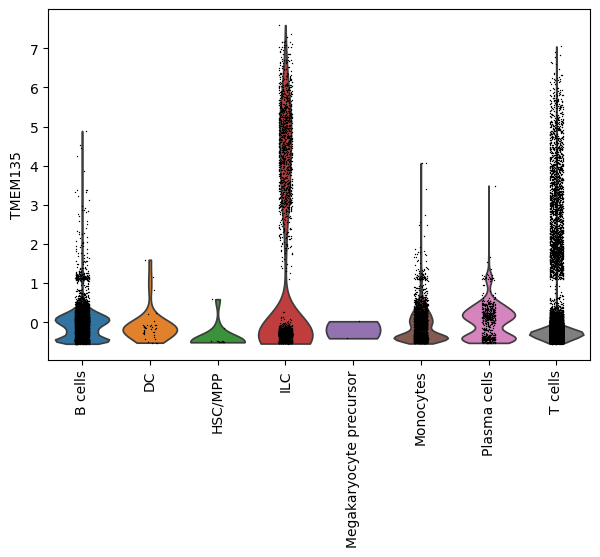

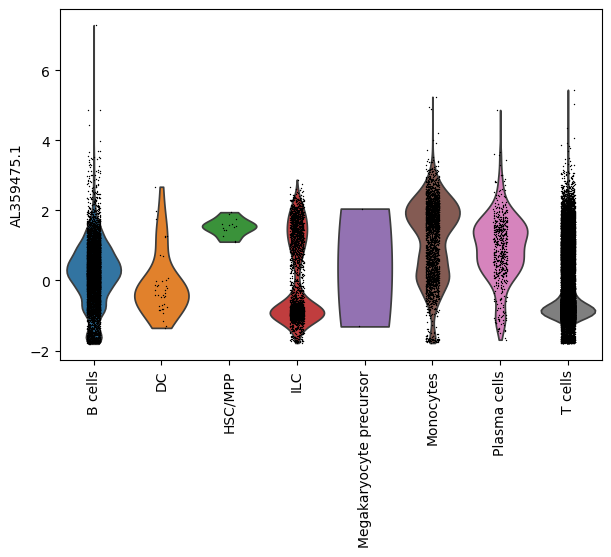

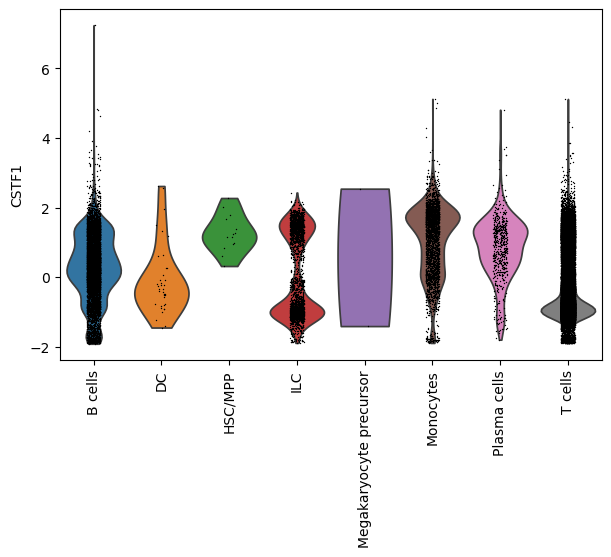

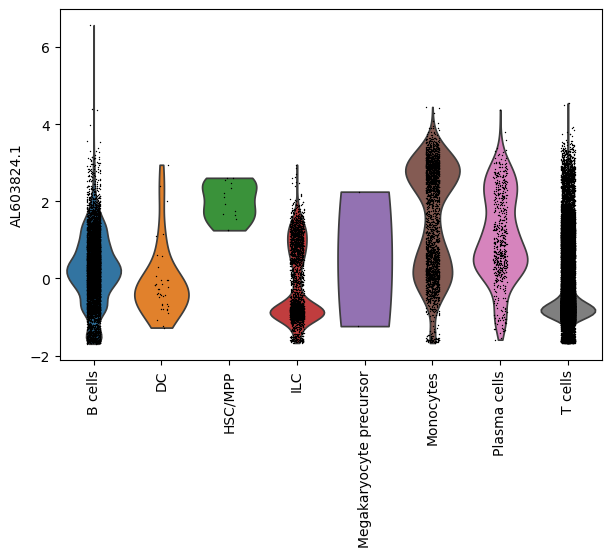

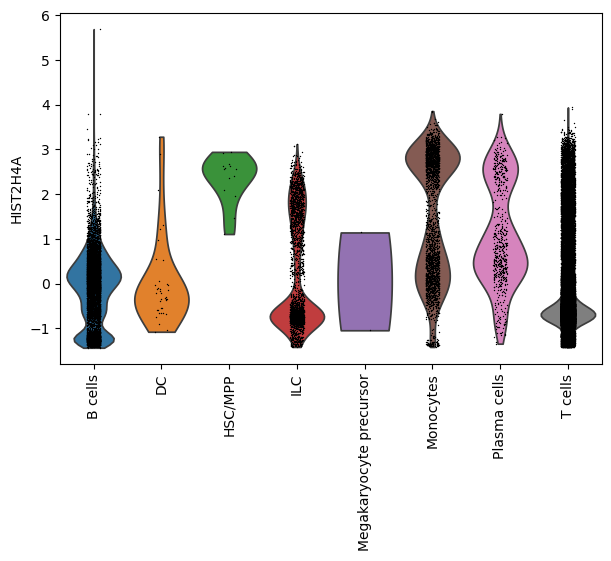

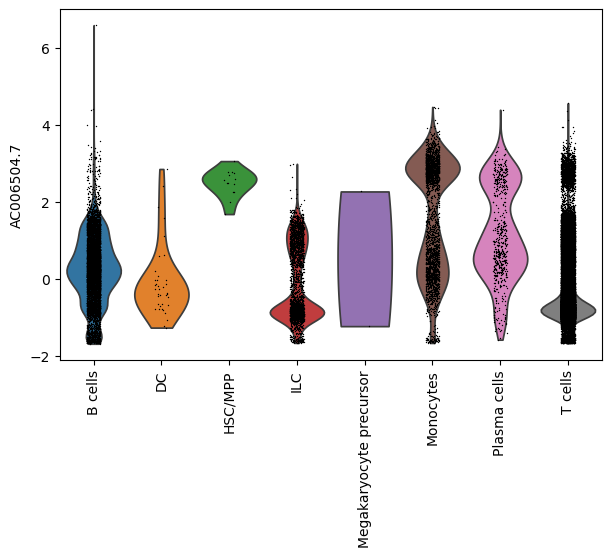

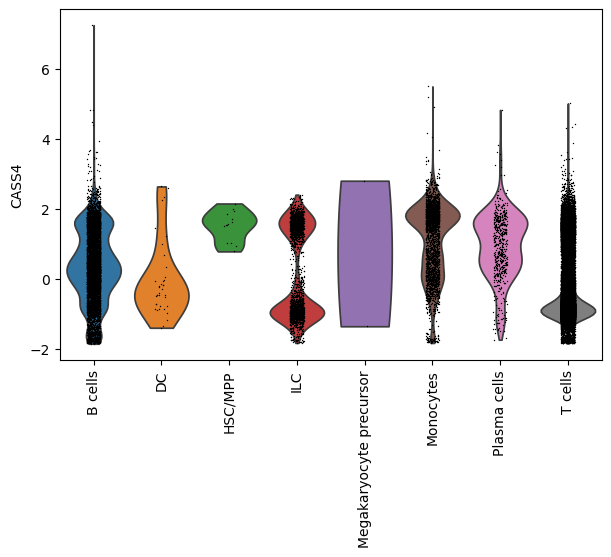

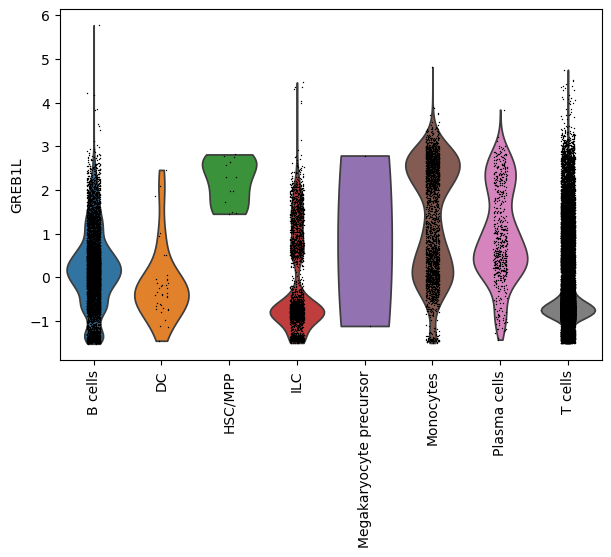

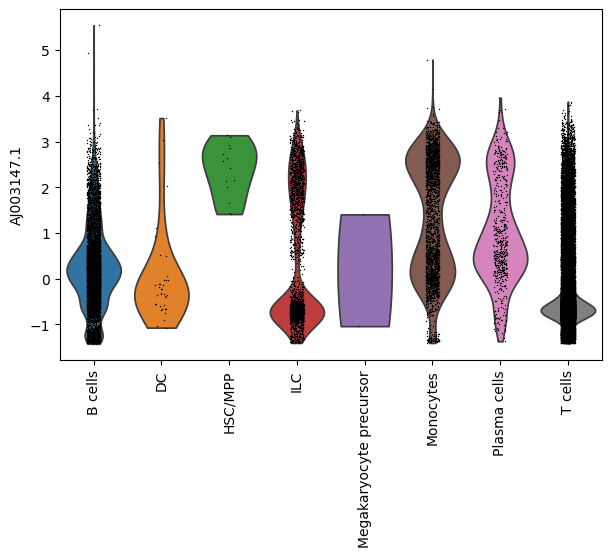

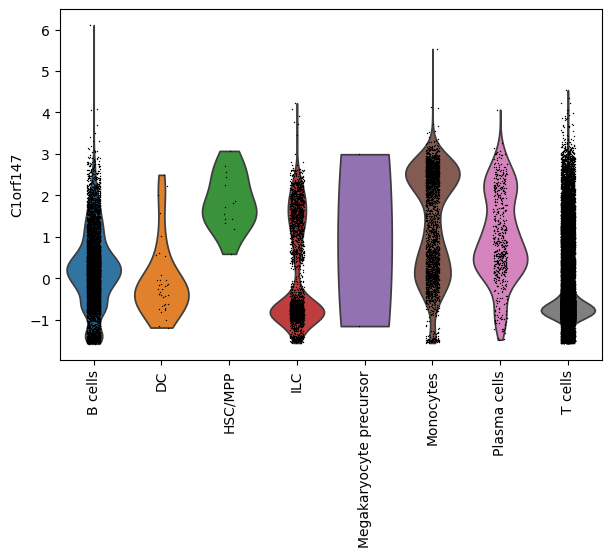

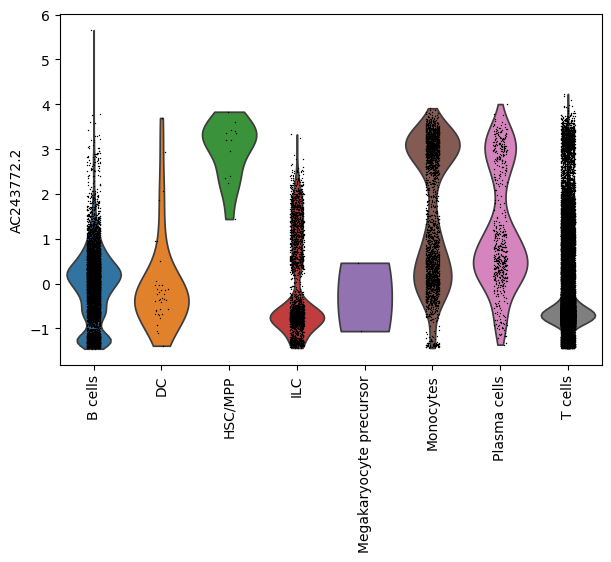

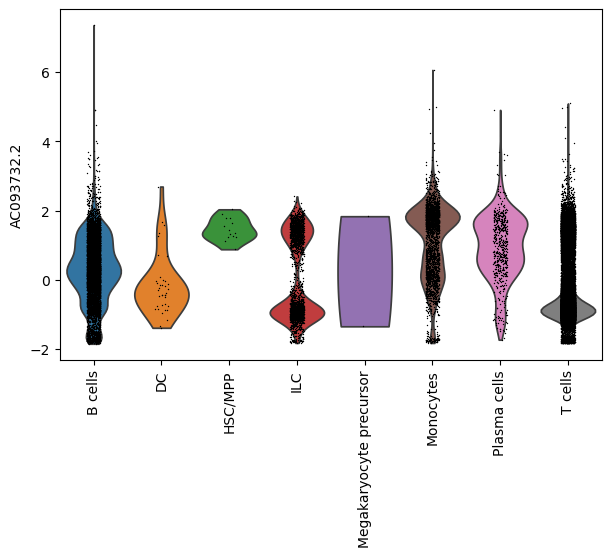

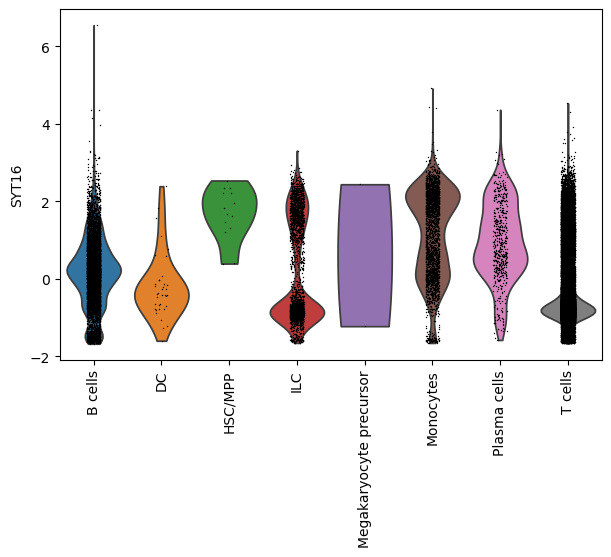

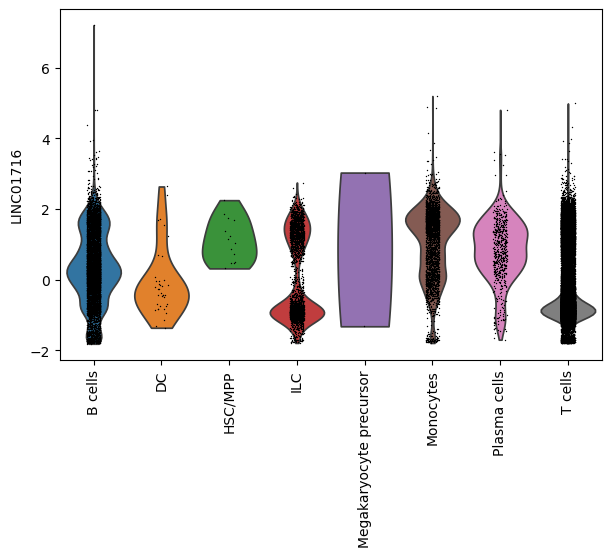

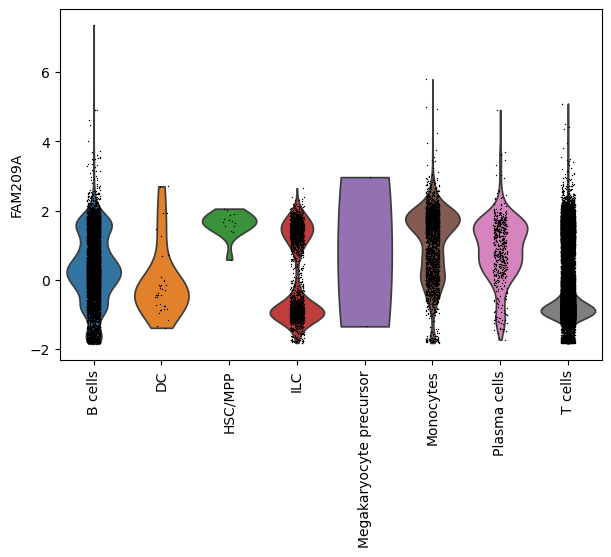

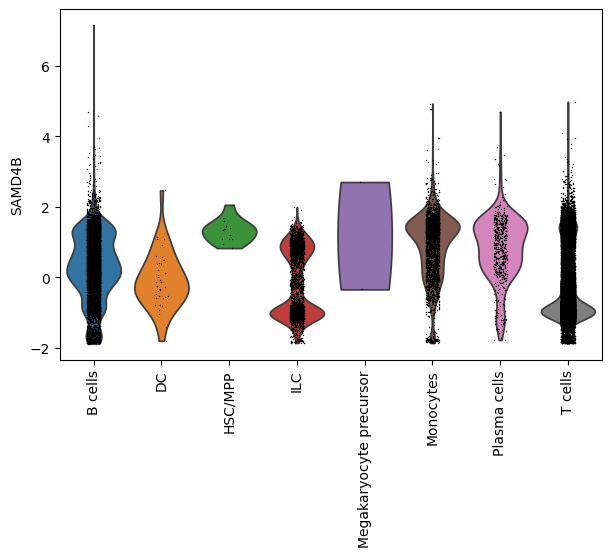

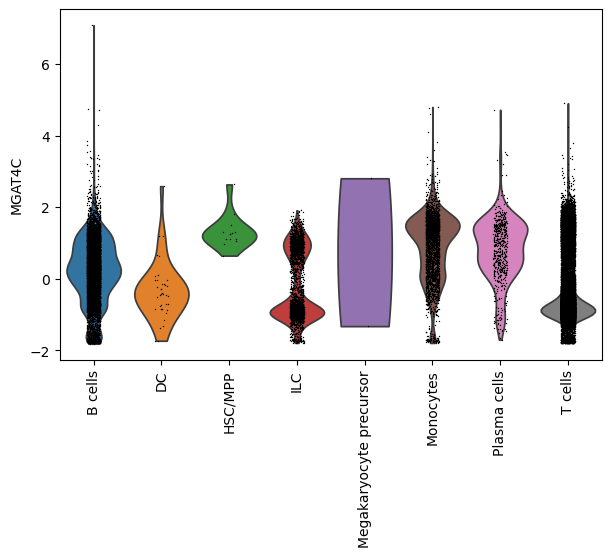

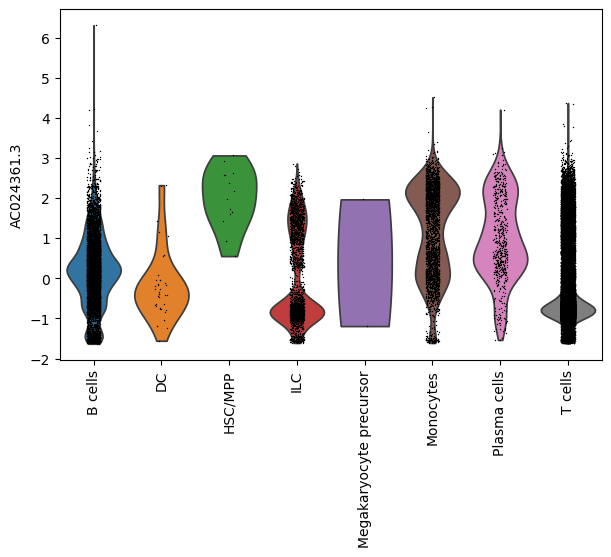

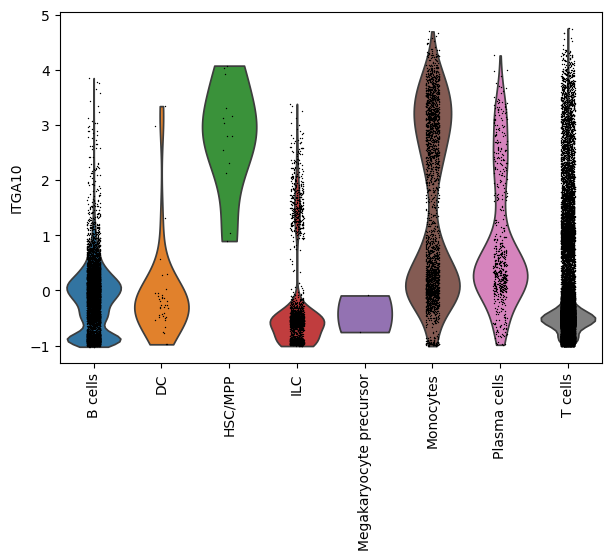

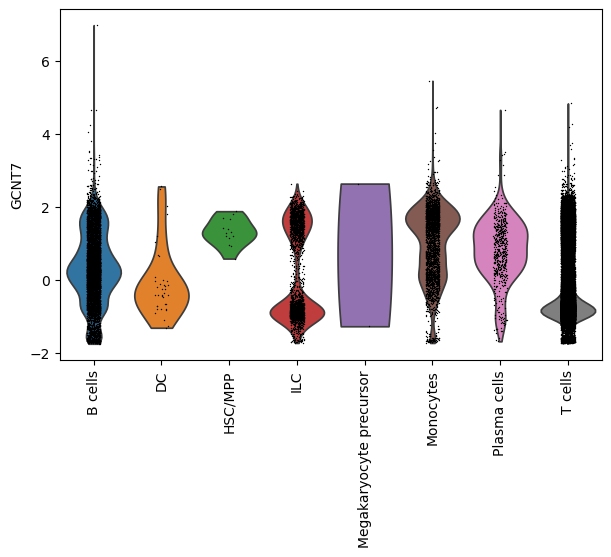

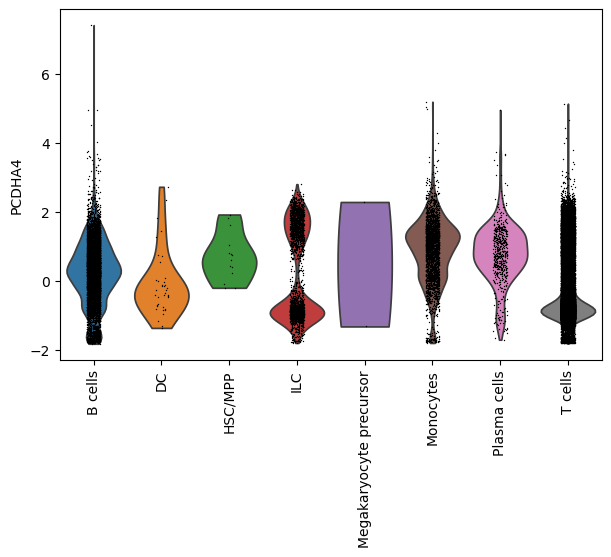

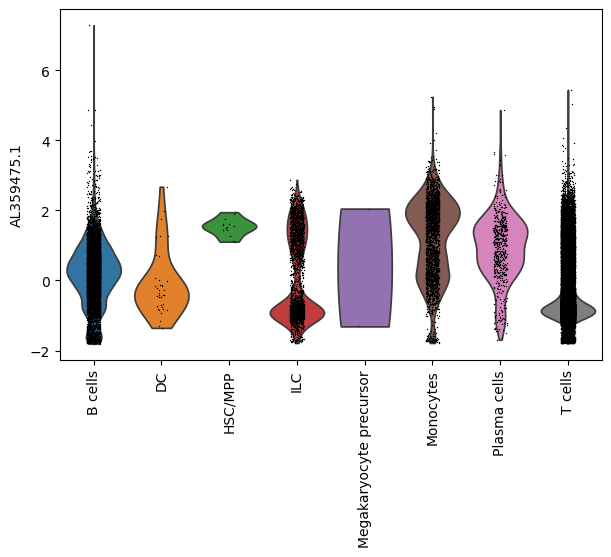

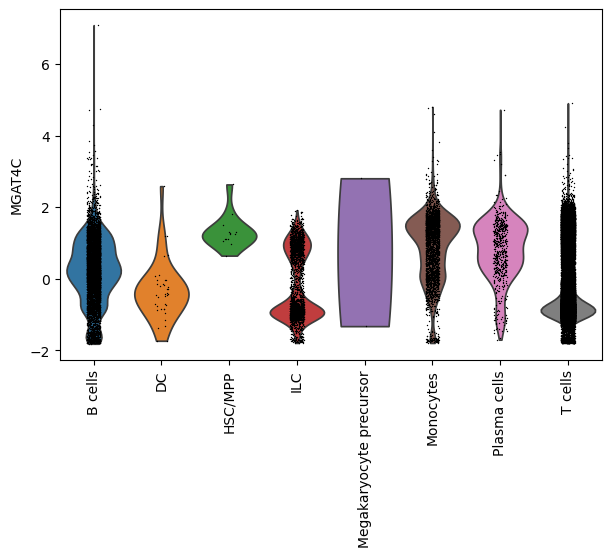

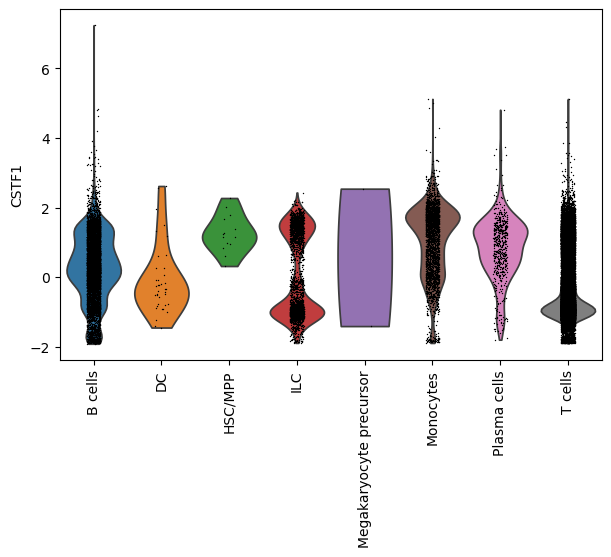

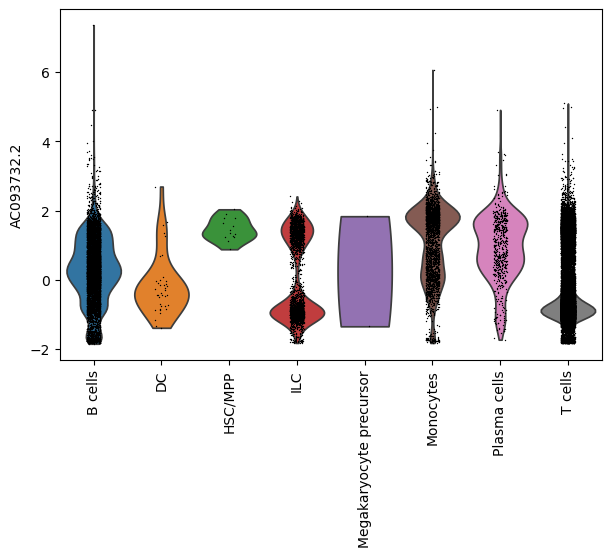

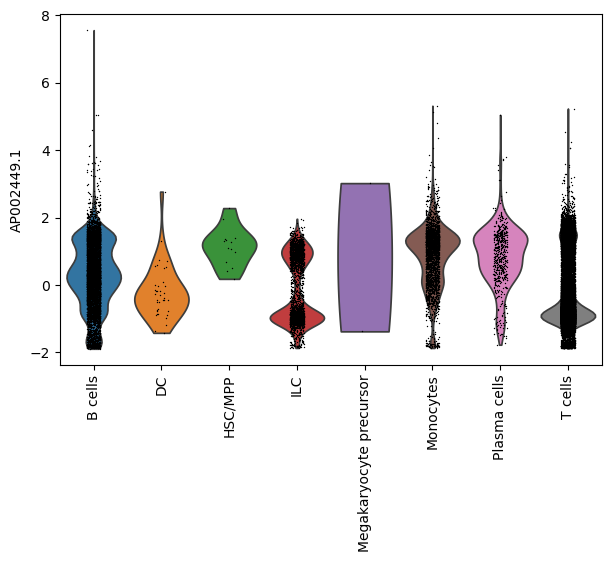

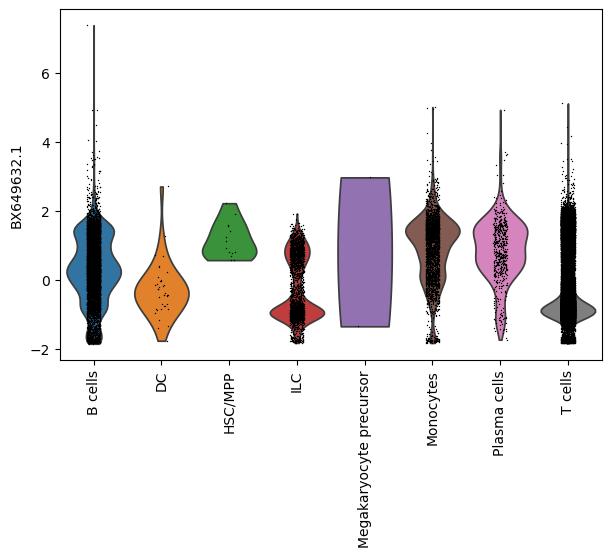

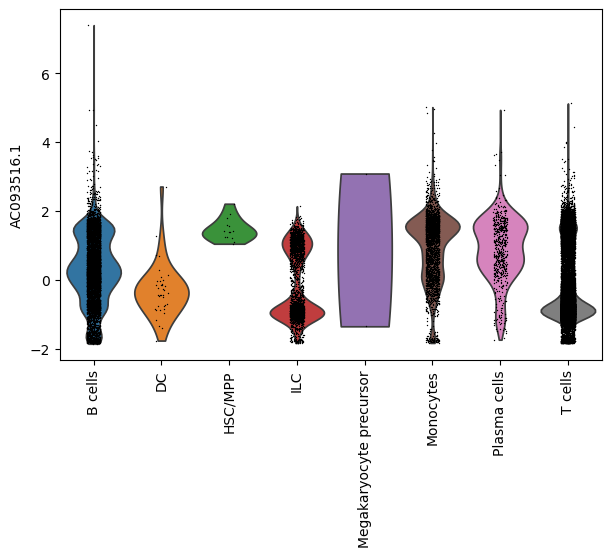

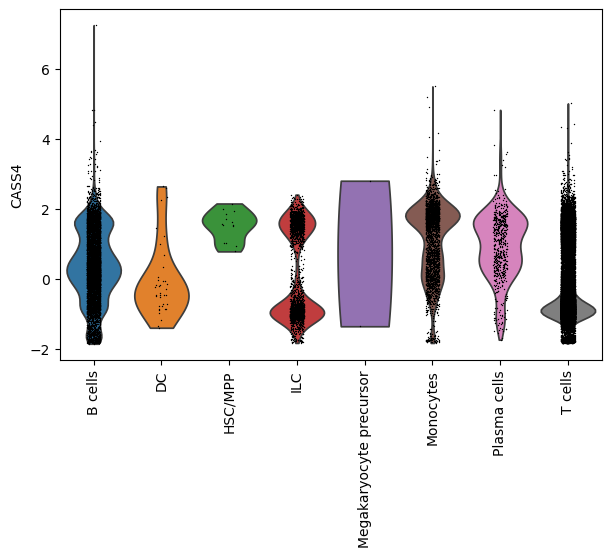

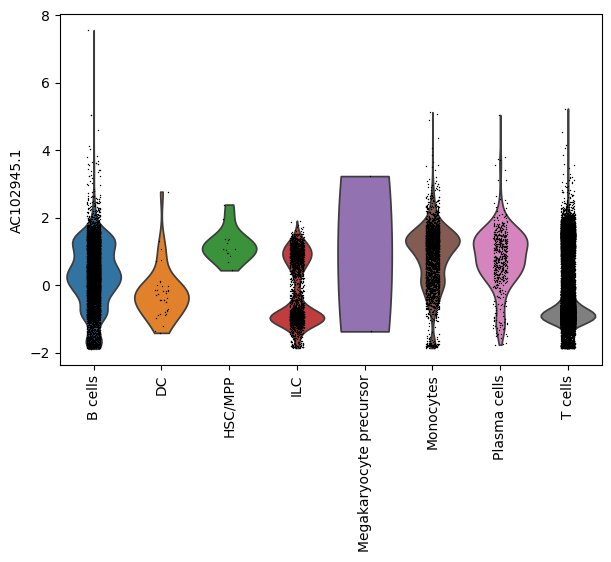

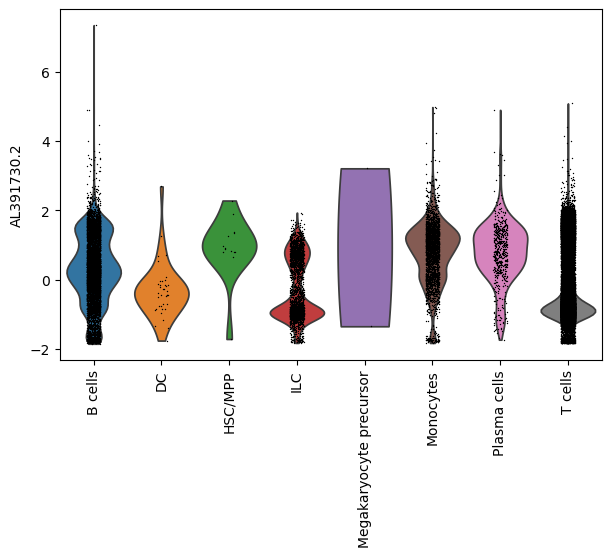

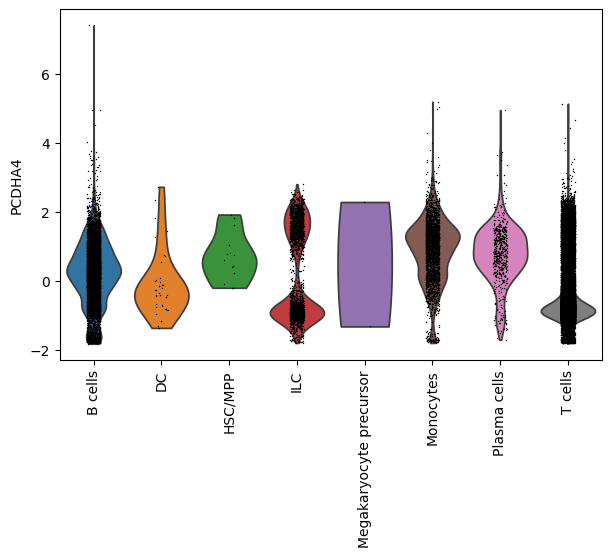

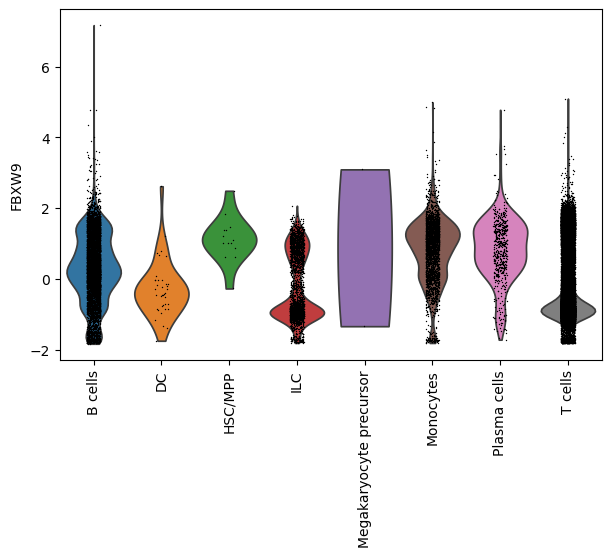

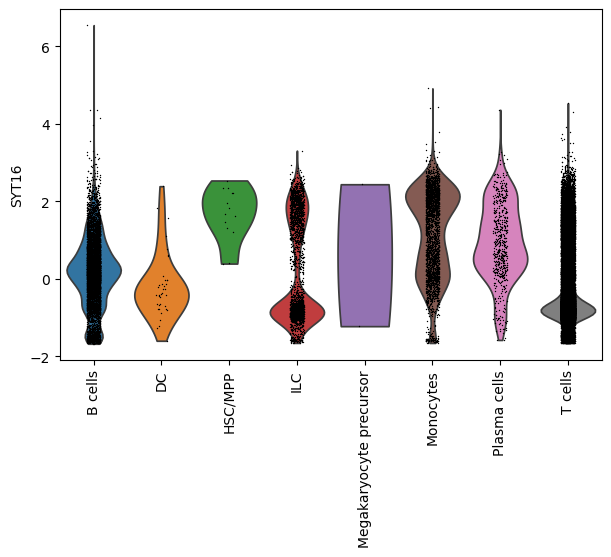

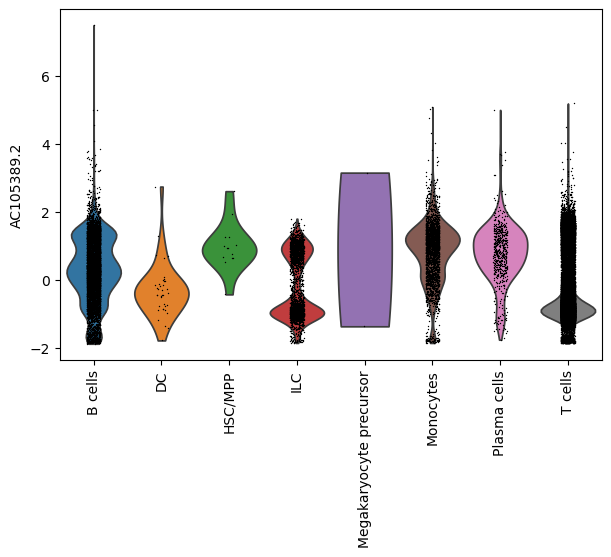

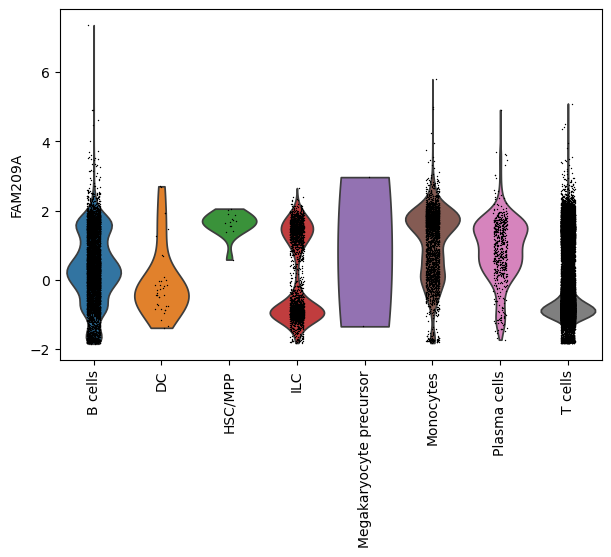

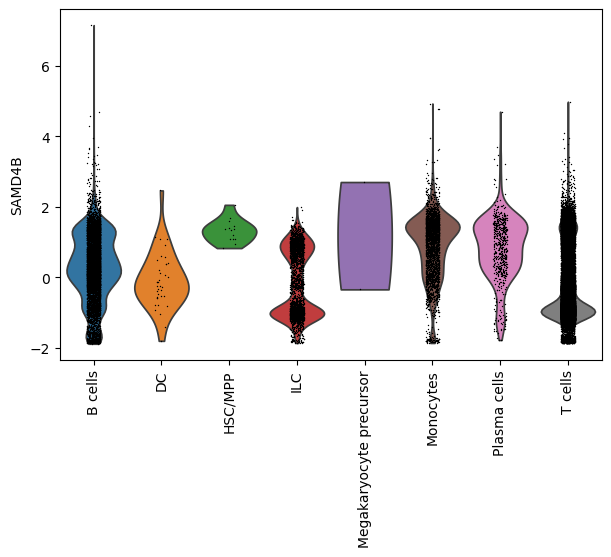

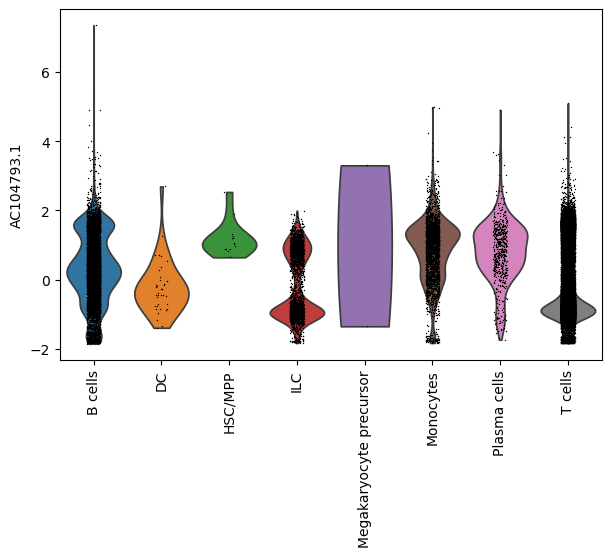

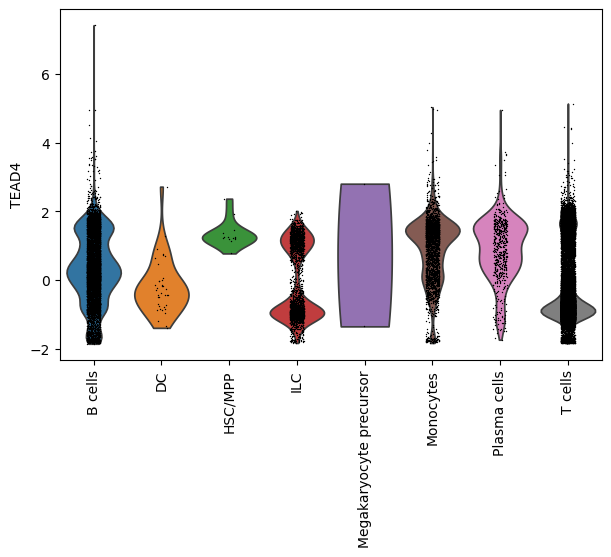

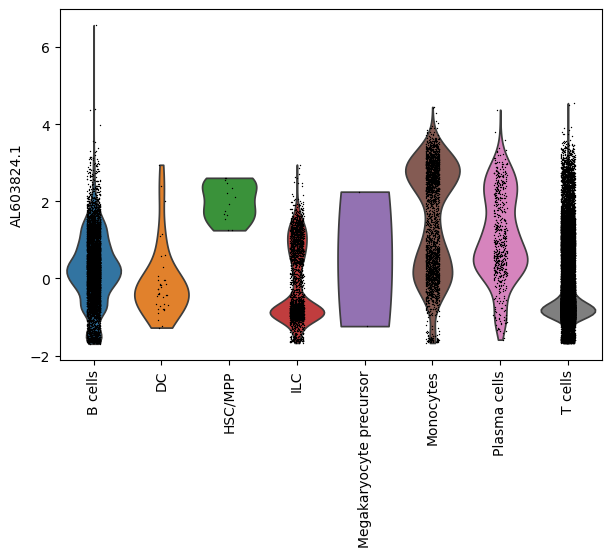

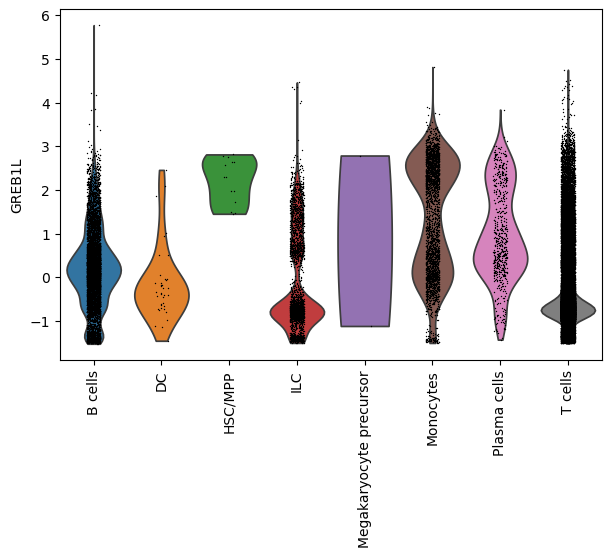

In [19]:
for gene in marker_genes:
    sc.pl.violin(adata, gene, groupby='cell_types_labels', rotation=90)

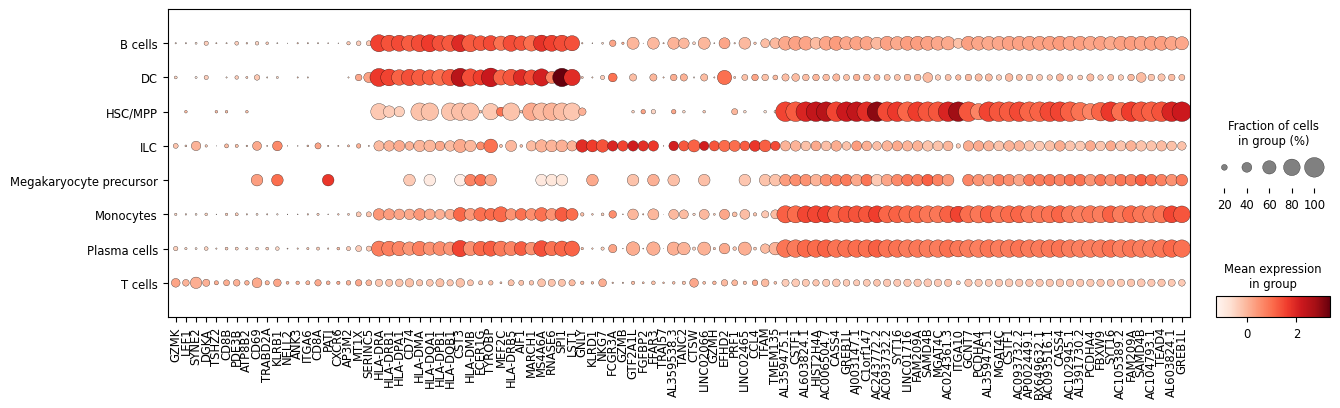

In [20]:
sc.pl.dotplot(adata, marker_genes, groupby='cell_types_labels', figsize=(15, 4), dendrogram=False);

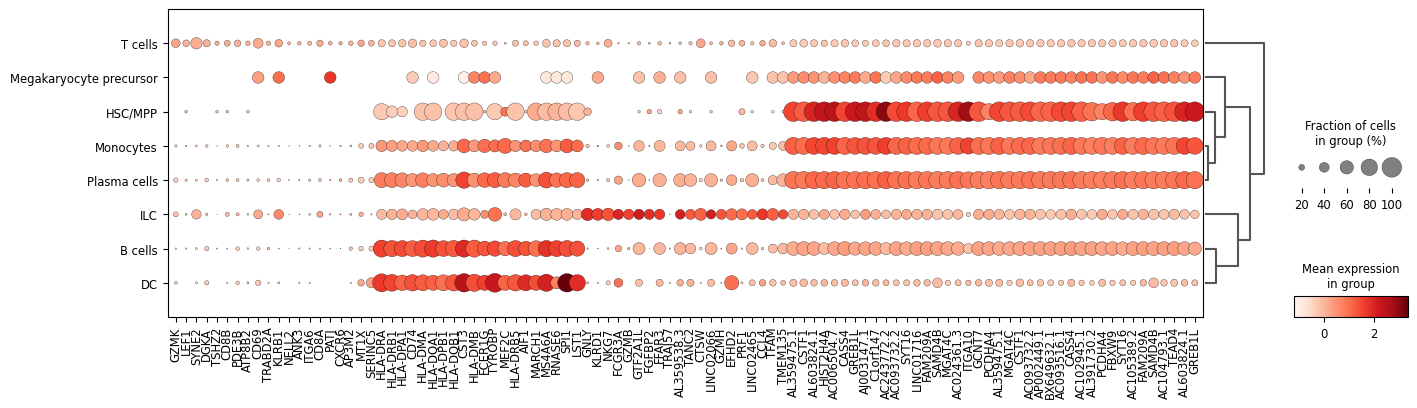

In [21]:
sc.pl.dotplot(adata, marker_genes, groupby='cell_types_labels', figsize=(16, 4), dendrogram=True);

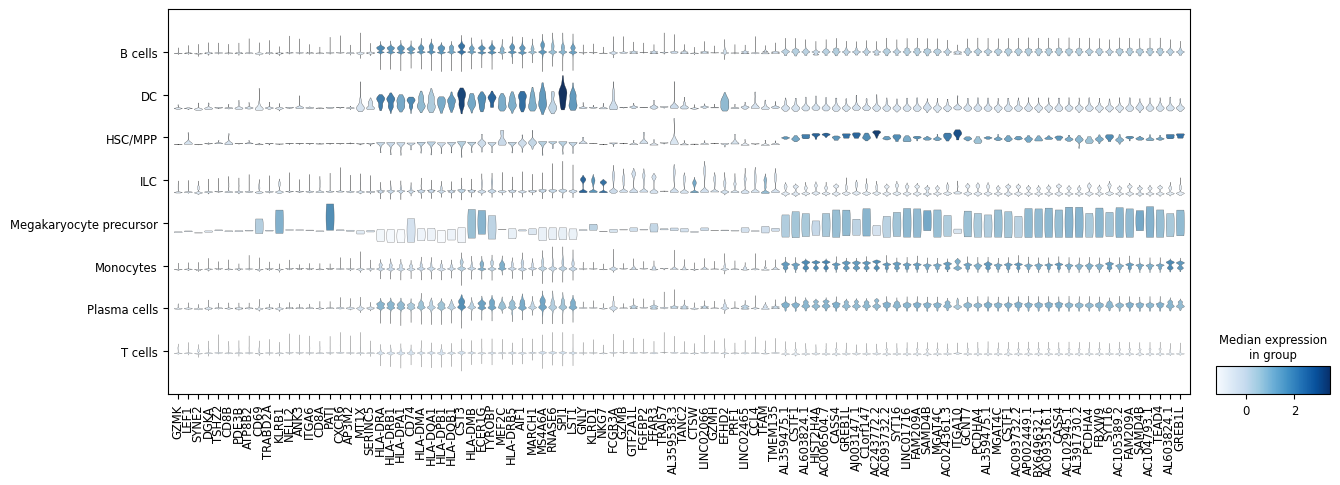

In [22]:
sc.pl.stacked_violin(adata, marker_genes, groupby='cell_types_labels', figsize=(15, 5), dendrogram=False);

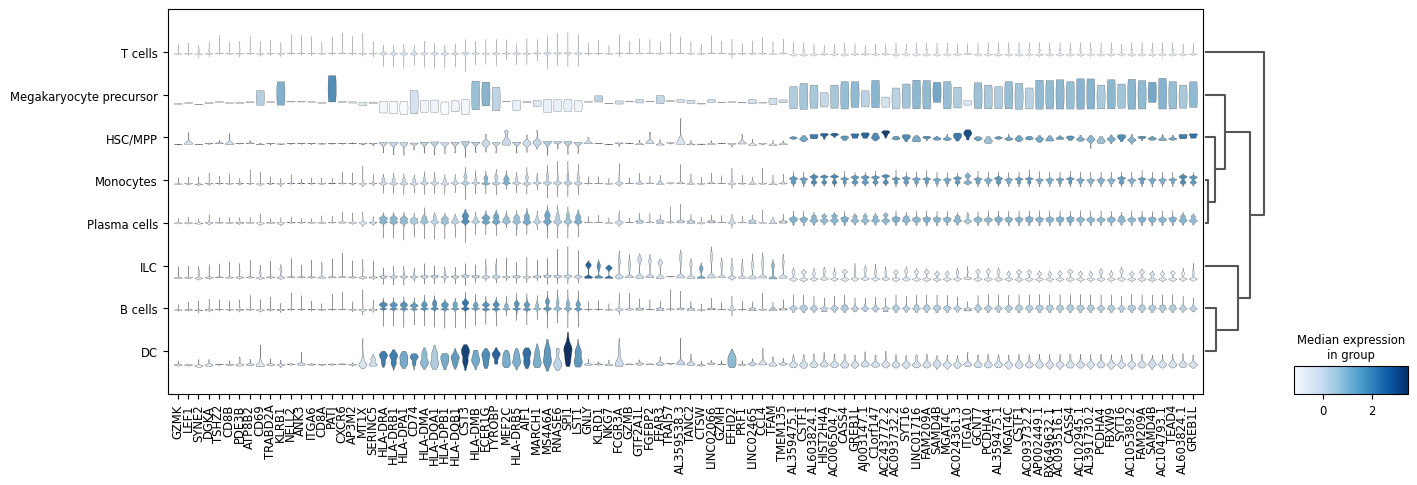

In [23]:
sc.pl.stacked_violin(adata, marker_genes, groupby='cell_types_labels', figsize=(16, 5), dendrogram=True);

In [24]:
adata_rest = adata[~adata.obs['cell_types_labels'].isin(most_freq_cell_types)]

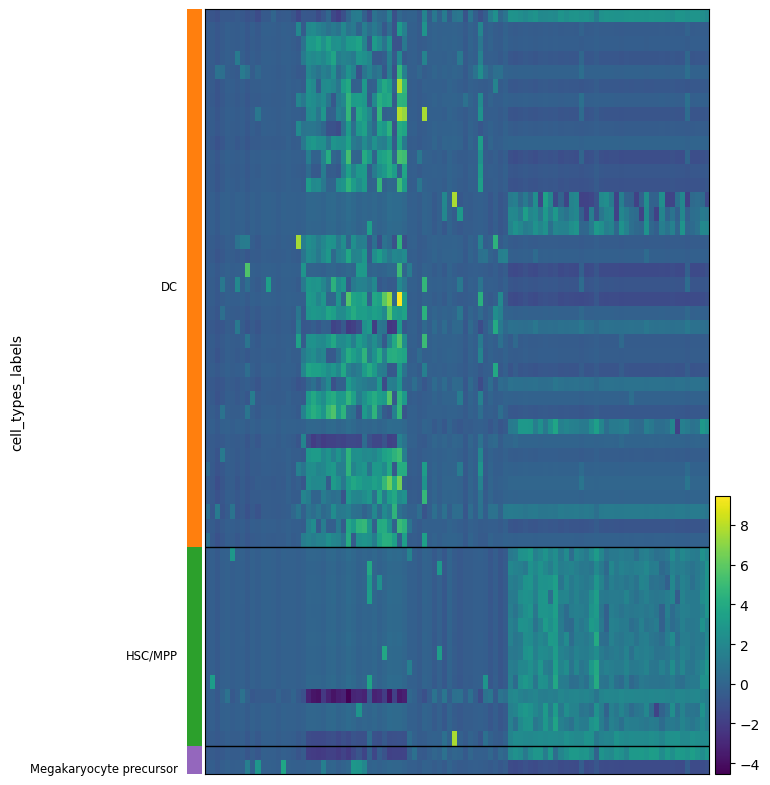

In [25]:
sc.pl.heatmap(adata_rest, marker_genes, groupby='cell_types_labels', dendrogram=False, figsize=(7, 10));

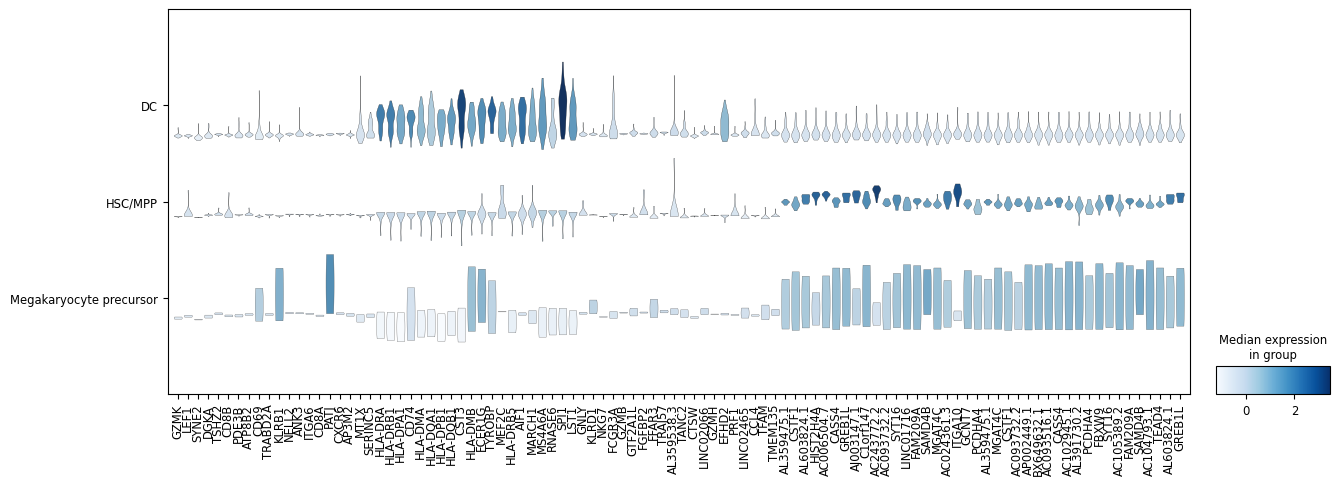

In [26]:
sc.pl.stacked_violin(adata_rest, marker_genes, groupby='cell_types_labels', figsize=(15, 5));

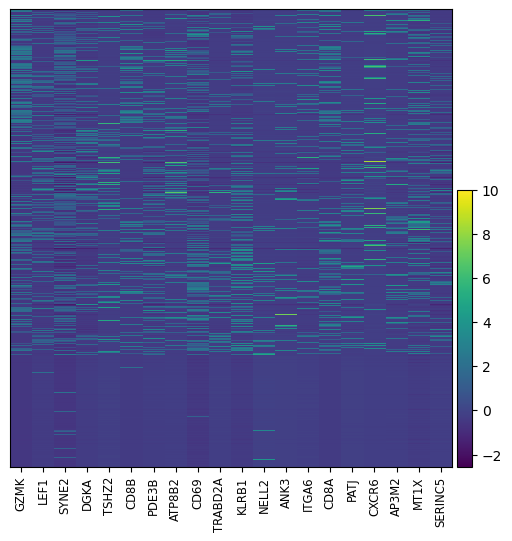

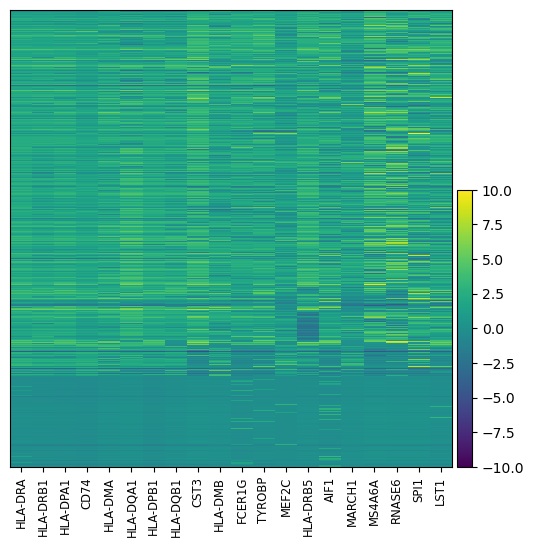

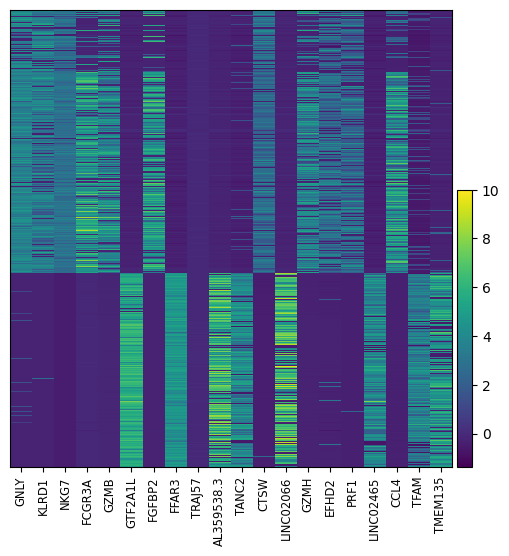

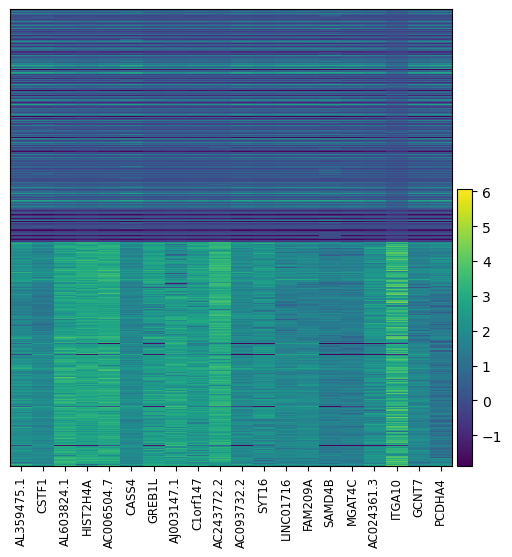

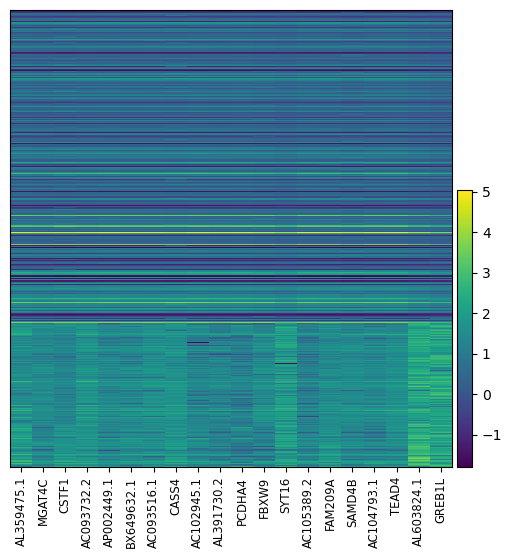

In [27]:
for cell_type in most_freq_cell_types:
    sc.pl.heatmap(adata[adata.obs['cell_types_labels'] == cell_type],
        cluster_genes[cell_type], groupby='cell_types_labels', dendrogram=False);